# Importing data + package imports

In [19]:
%%time
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import sys
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.impute import KNNImputer


sys.path.append('../Python-Files')
from utilities import boxplot, scatter, histogram, bar
pd.set_option('display.max_columns', None)

# Load data
data = pd.read_csv('../Given-Files/forestCover.csv')

# 0 indexing for some models
data['Cover_Type'] = data['Cover_Type'] - 1

# Convert to correct type
data['Soil_Type1'] = data['Soil_Type1'].map(lambda x: 1 if x == 'positive' else 0)

# Swap column names
data = data.rename(columns={
    "Water_Level": "temp_label",
    "Observation_ID": "Water_Level"
}).rename(columns={"temp_label": "Observation_ID"})

# Find features with missing values indicated by '?' or None
data.columns[
    data.apply(lambda x: ('?' in x.unique()) or (x.isnull().any()))
].to_list()

print(f'Columns with missing values: {data.columns[data.apply(lambda x: ("?" in x.unique()) or (x.isnull().any()))].to_list()}')
print(f'Percentage of missing values in Slope: {len(data[data["Slope"] == "?"]) / len(data) * 100:.2f}%')

# Slope values contain missing values
slope_mean = data[data['Slope'] != '?']['Slope'].astype(int).median()
data['Slope'] = data['Slope'].replace('?', int(slope_mean))
print(f'Median of Slope (used for imputation): {slope_mean:.2f}')
print(f'Percentage of missing values in Slope: {len(data[data["Slope"] == "?"]) / len(data) * 100:.2f}%')

print(f'Cardinality of Observation_ID: {data["Observation_ID"].nunique()}')

# Drop since unique 
data = data.drop(columns=['Observation_ID'])

print(f'Cardinality of Water_Level: {data["Water_Level"].nunique()}')

# Cardinality of 1 so drop
data = data.drop(columns=['Water_Level'])

# Change data types
data['Slope'] = data['Slope'].astype(int)
data['Cover_Type'] = data['Cover_Type'].astype('category')
features = data.columns[12:56]
data[features] = data[features].astype(bool)

# High correlation between Facet and Aspect so drop Facet
data = data.drop(columns=['Facet'])

# Only contains noise so we drop
data = data.drop(columns=['Inclination'])

# Log transform 
data['Log_Horizontal_Distance_To_Hydrology'] = np.log1p(data['Horizontal_Distance_To_Hydrology'])
data = data.drop(columns=['Horizontal_Distance_To_Hydrology'])

# Save data
data.to_csv('../Processed-Datasets/forestCover-Preprocessed.csv', index=False)

Columns with missing values: ['Slope']
Percentage of missing values in Slope: 0.05%
Median of Slope (used for imputation): 13.00
Percentage of missing values in Slope: 0.00%
Cardinality of Observation_ID: 581012
Cardinality of Water_Level: 1
CPU times: user 9.18 s, sys: 1e+03 ms, total: 10.2 s
Wall time: 10.2 s


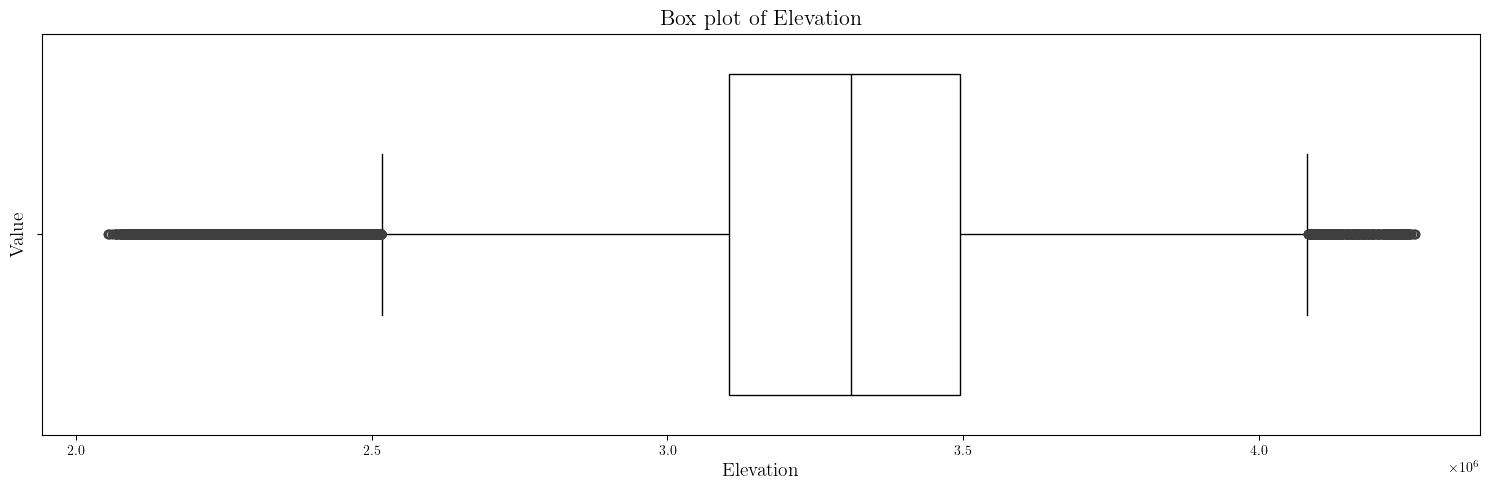

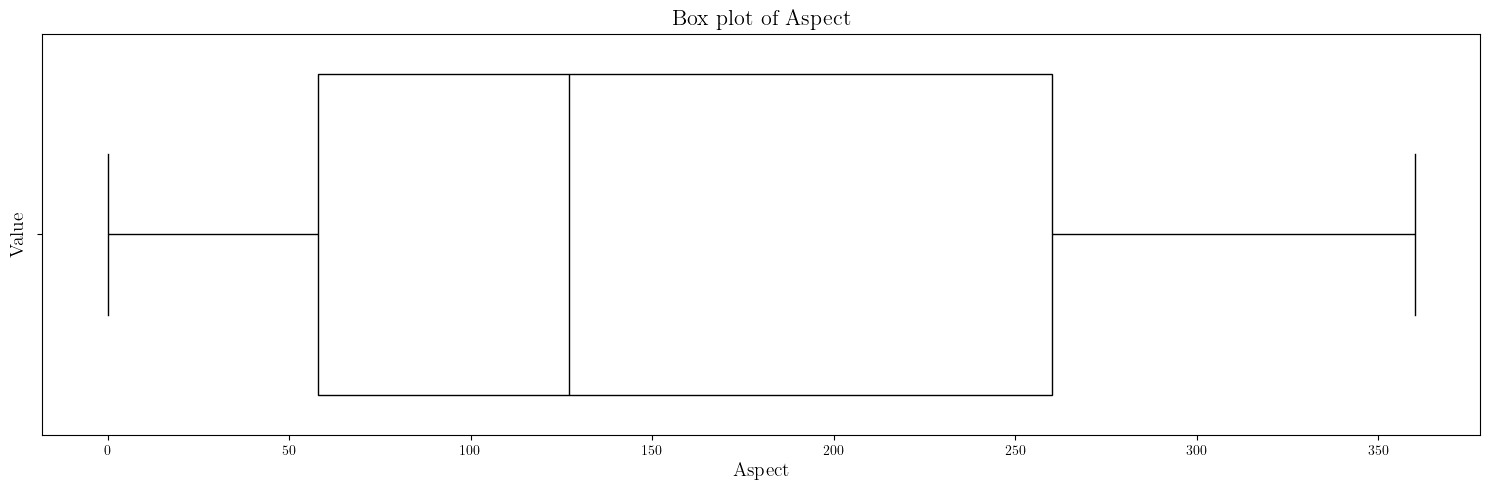

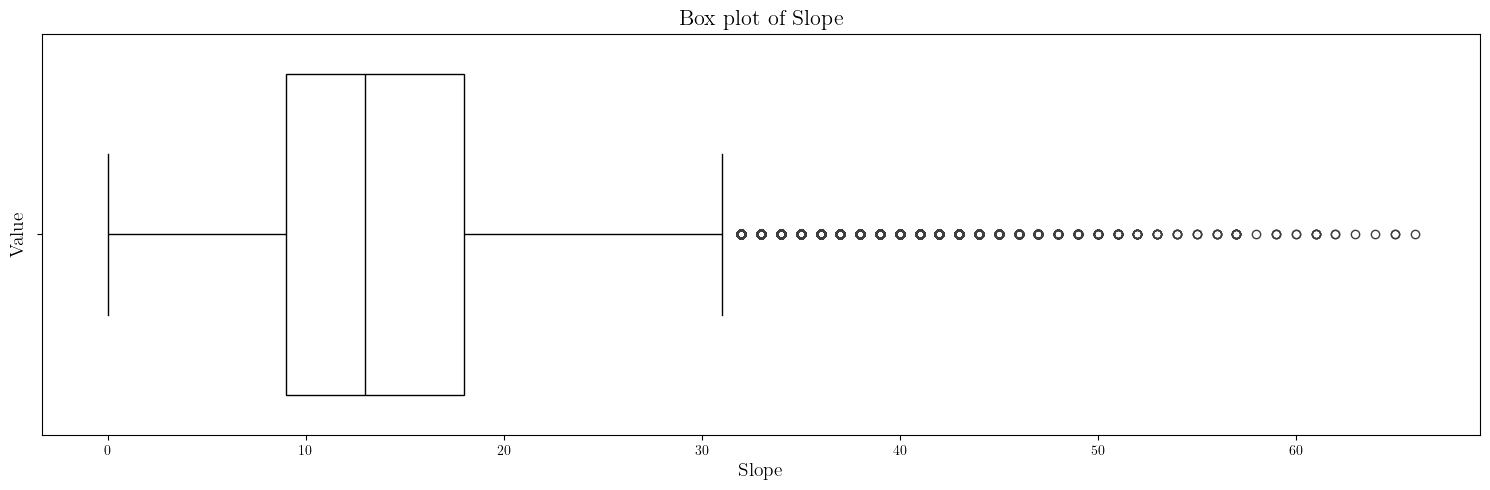

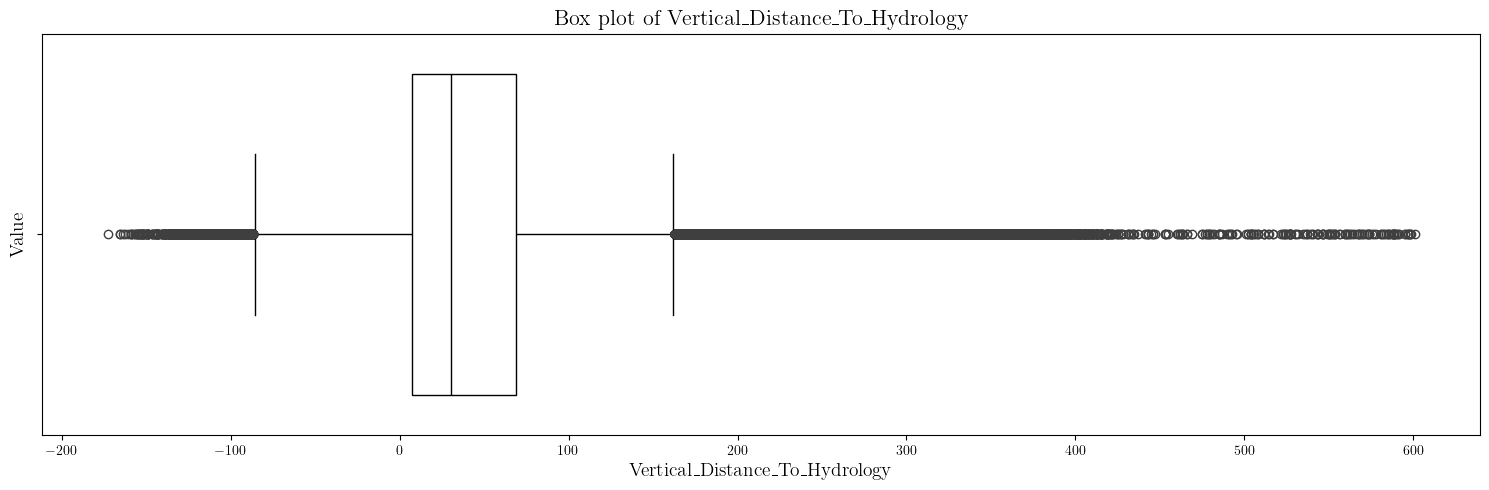

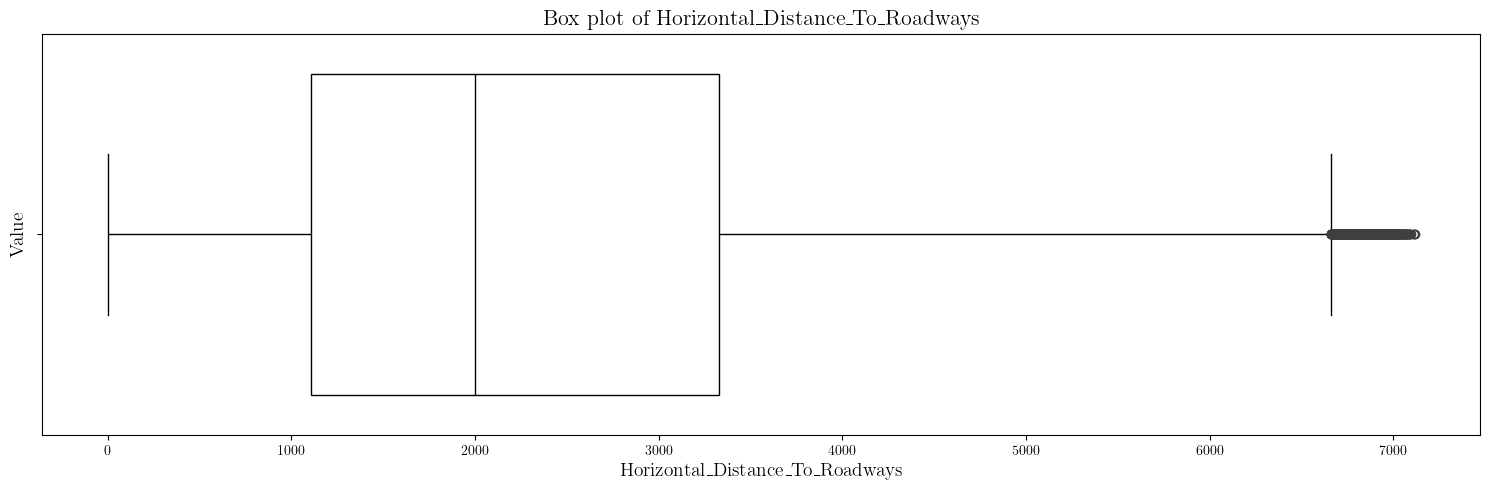

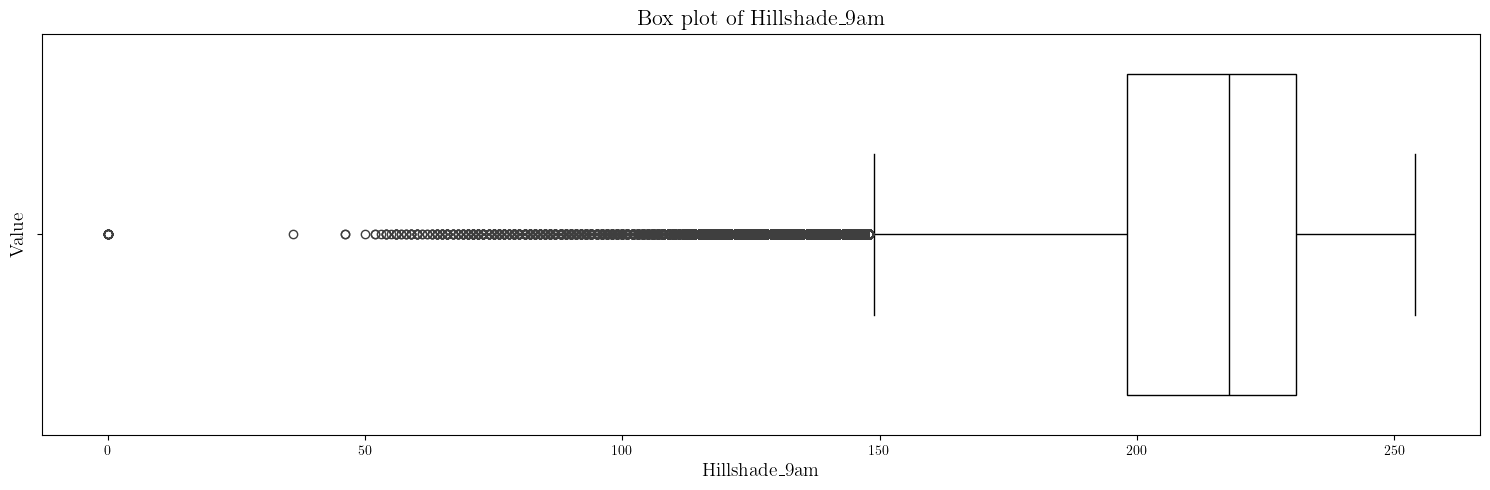

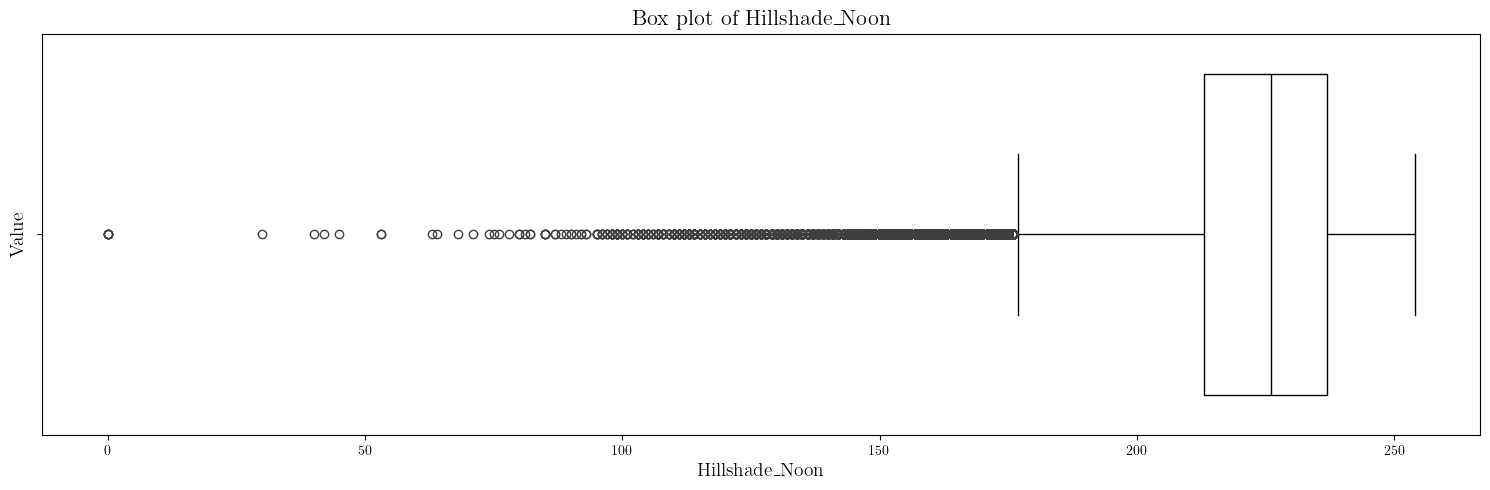

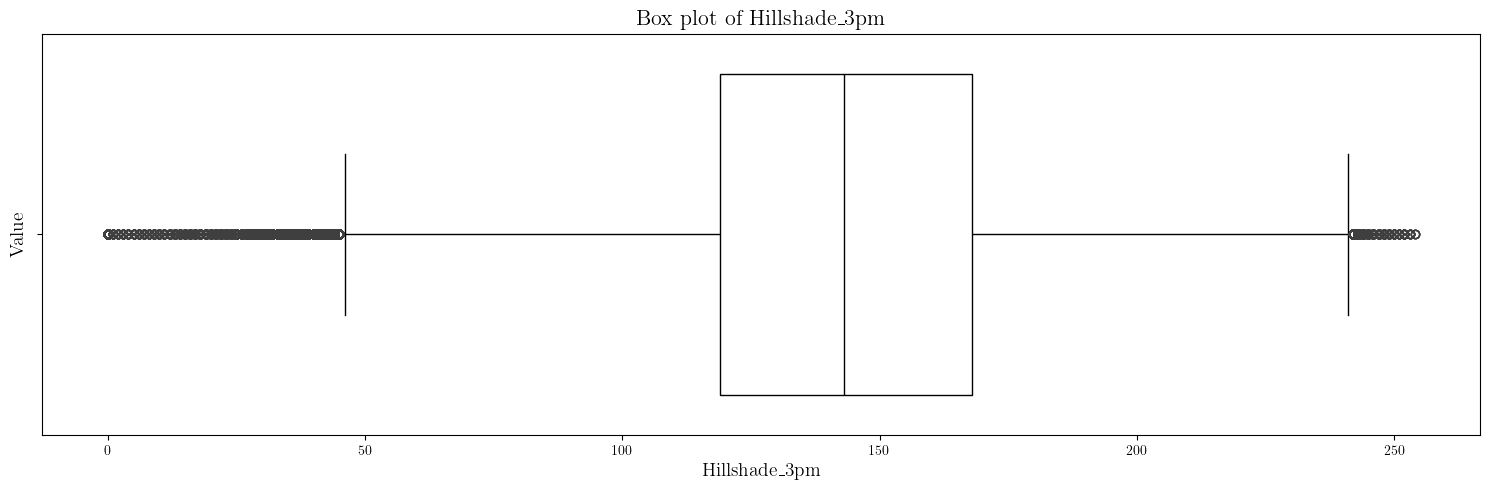

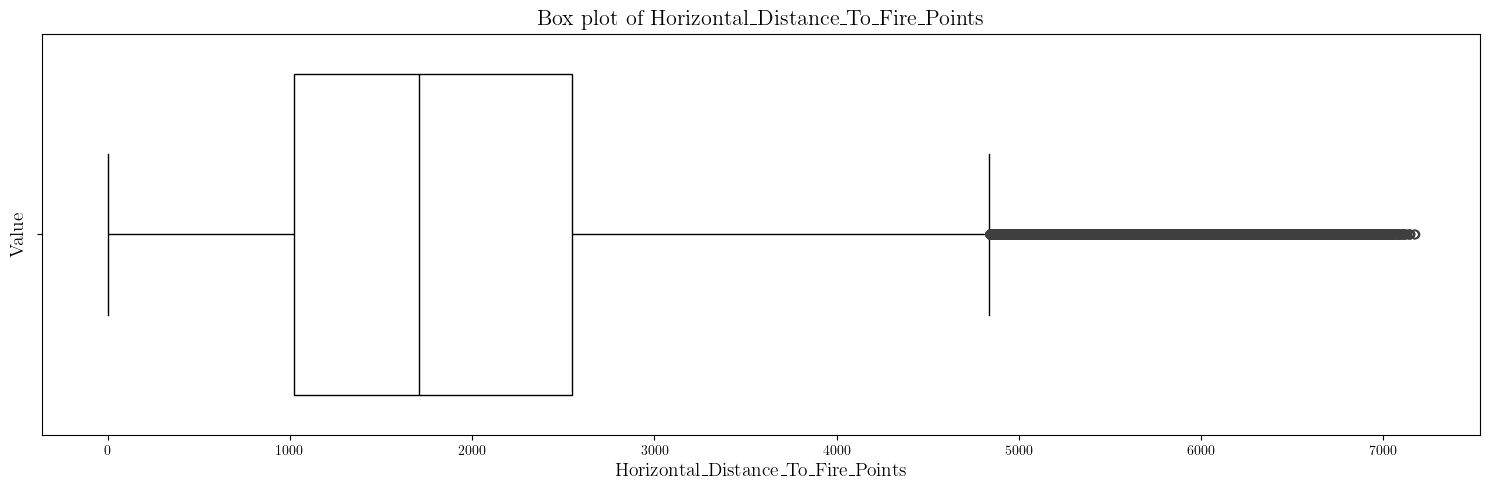

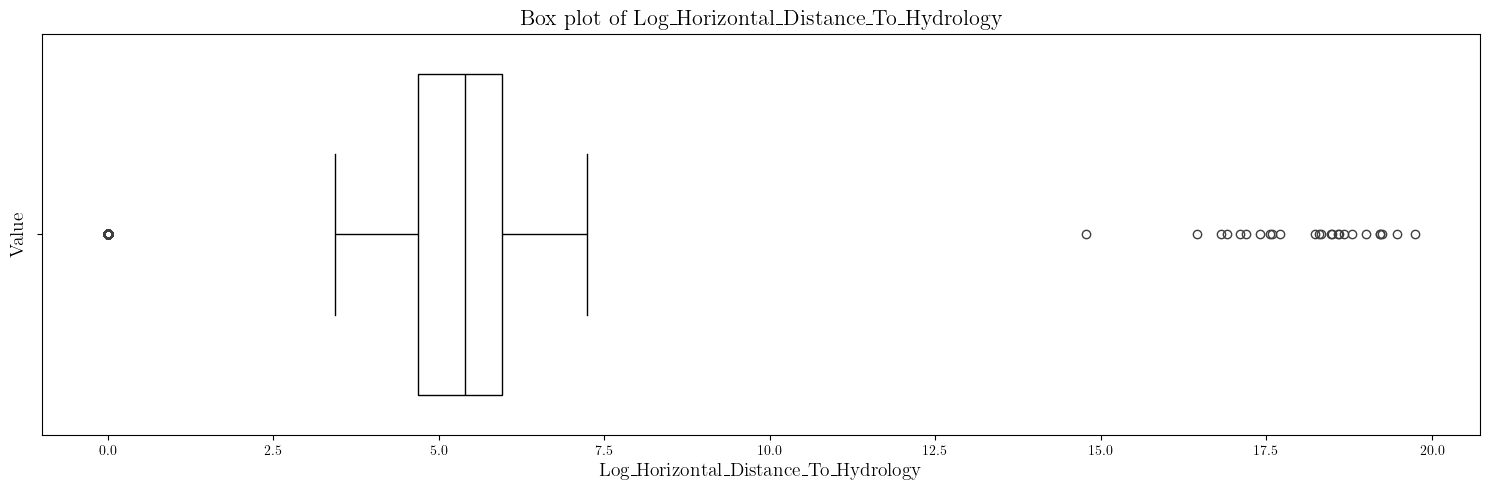

In [4]:
for feature in data.select_dtypes(include=[np.number]).columns:
    boxplot(data, feature, f'../Generated-Figures/Boxplots/{feature}-Boxplot.png')

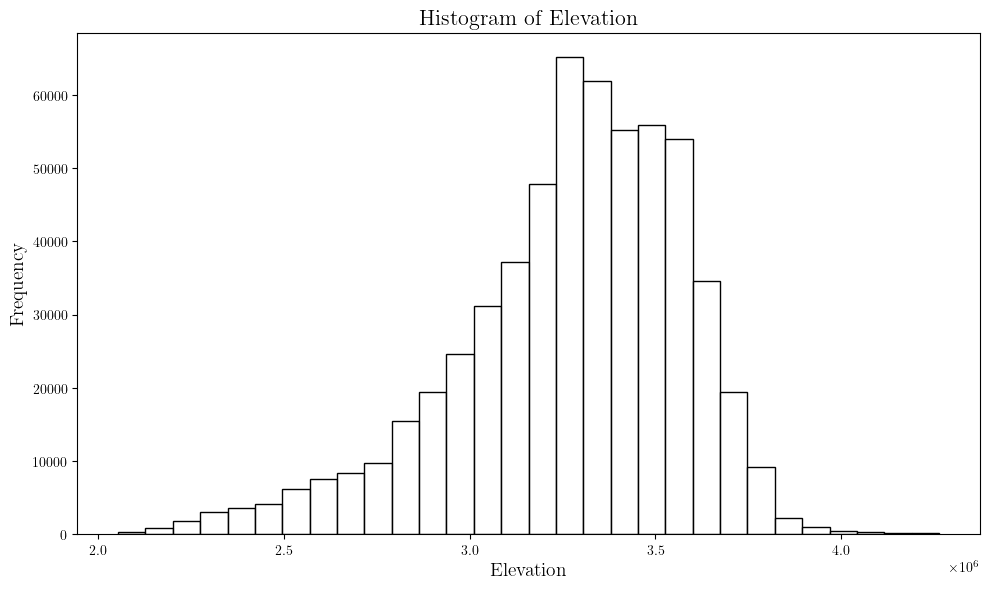

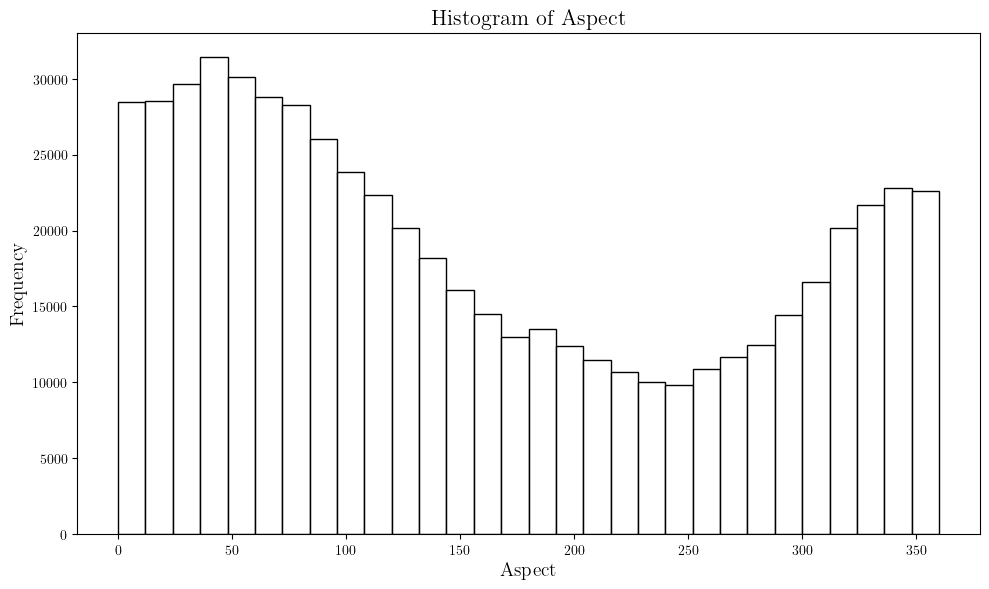

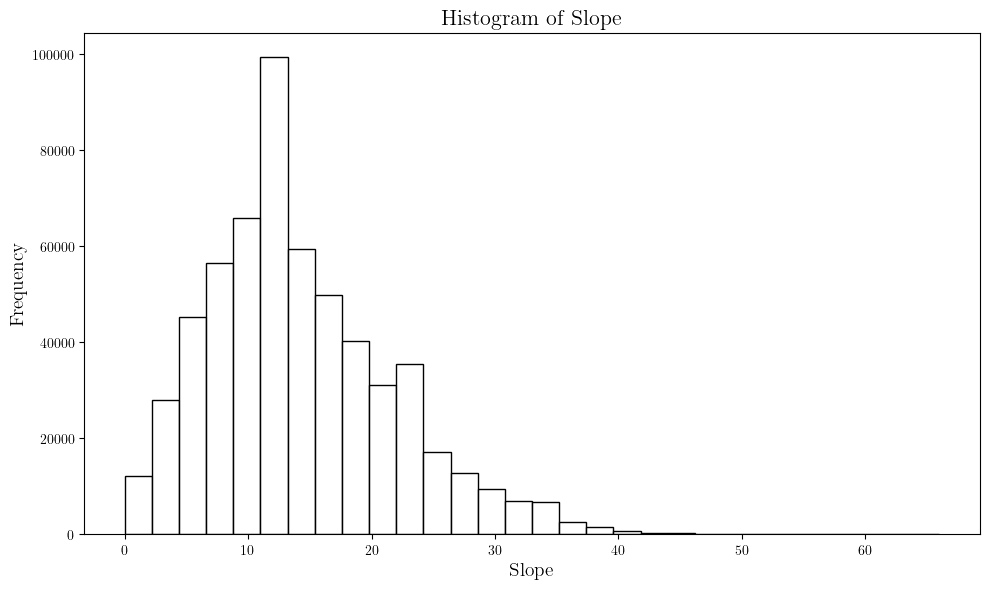

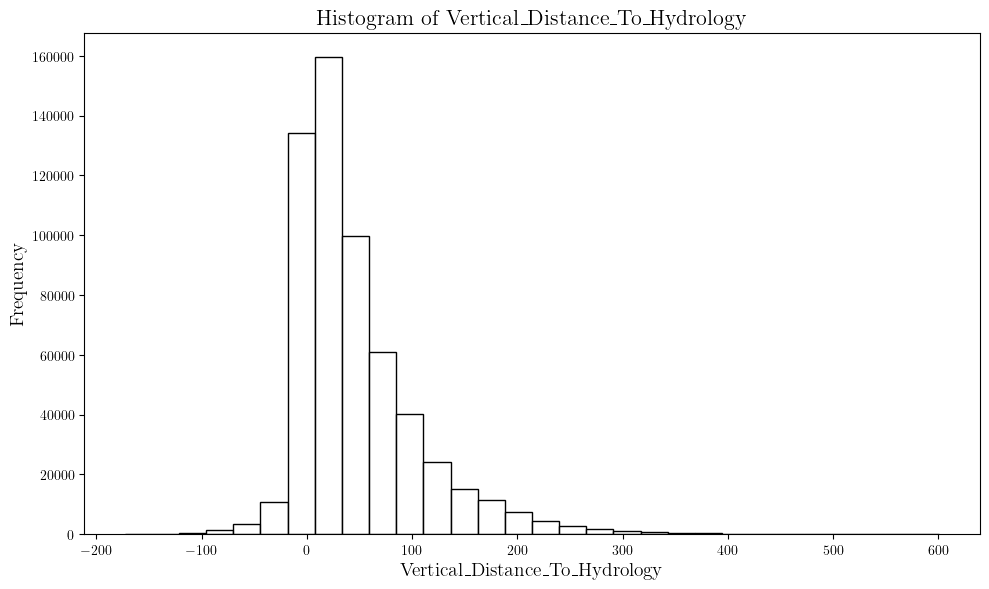

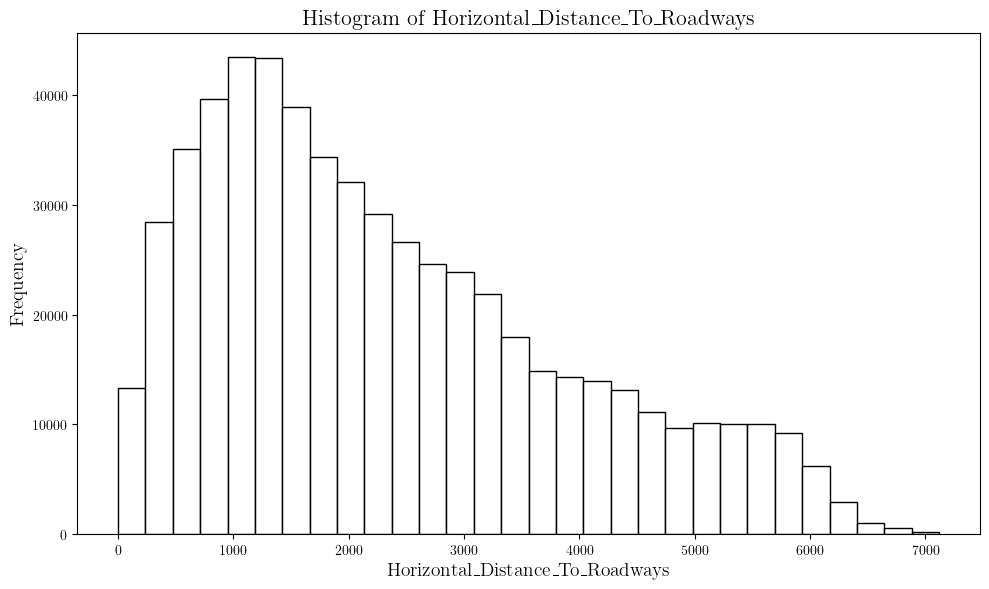

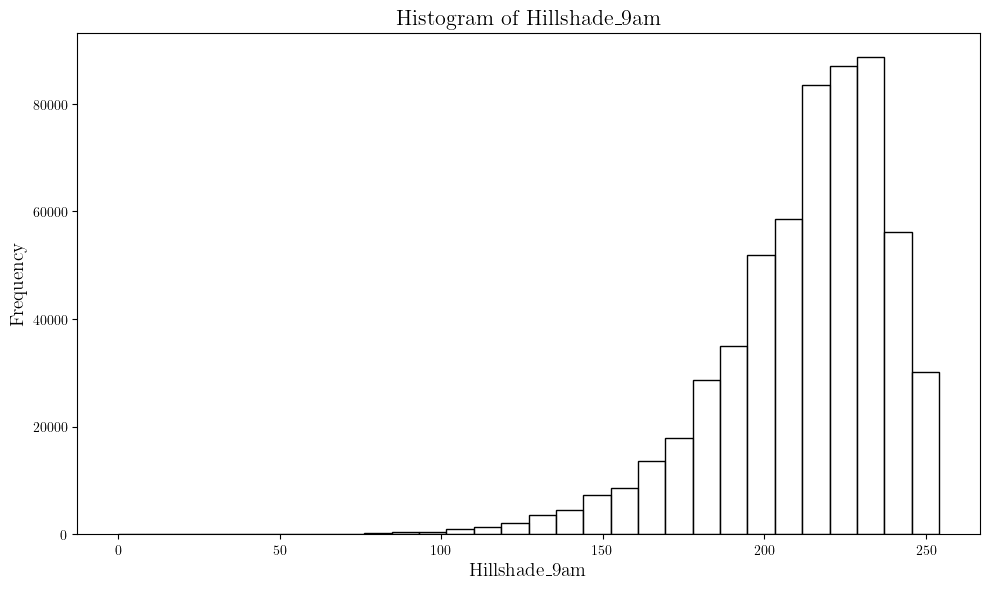

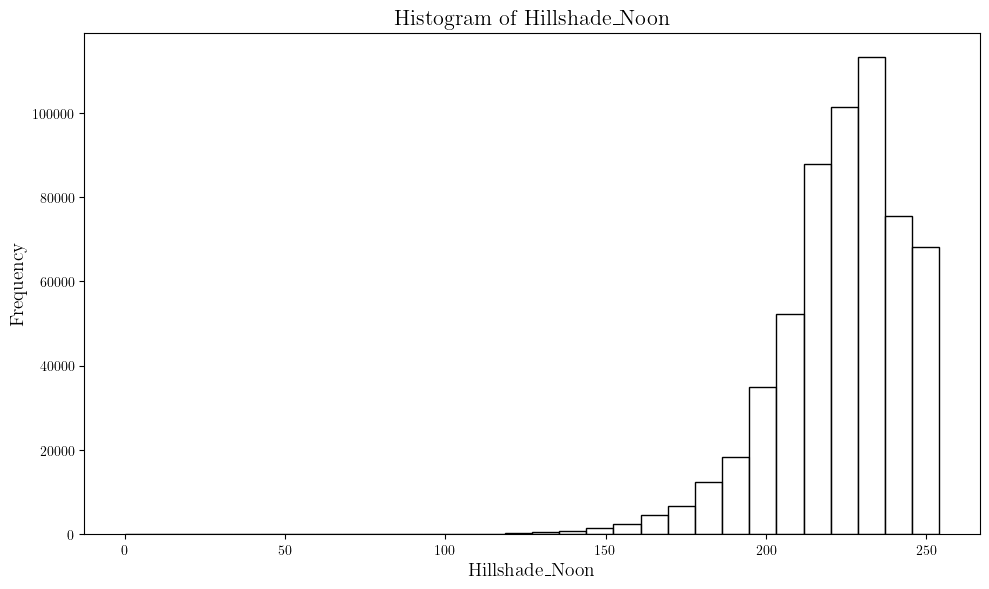

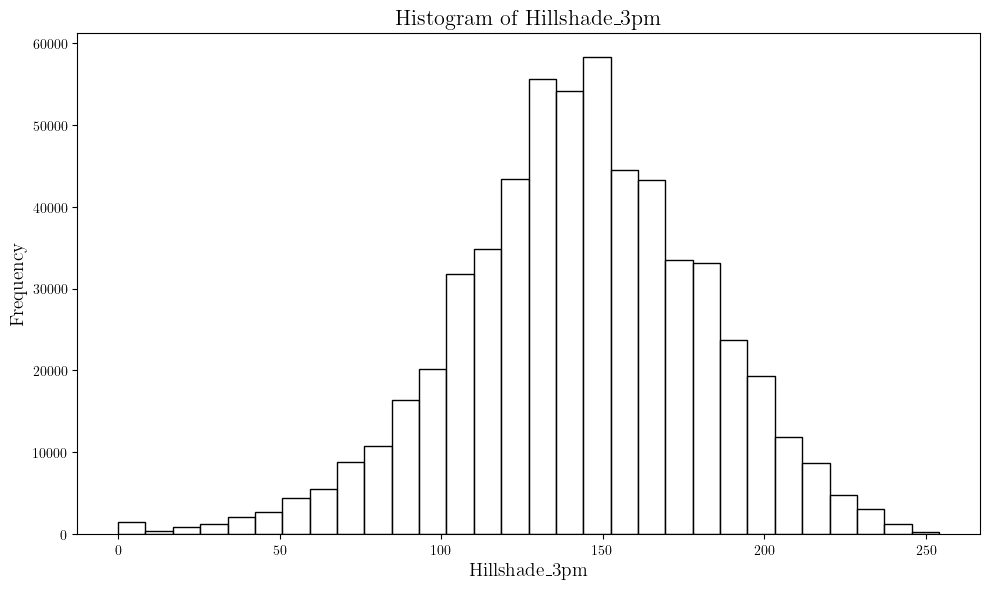

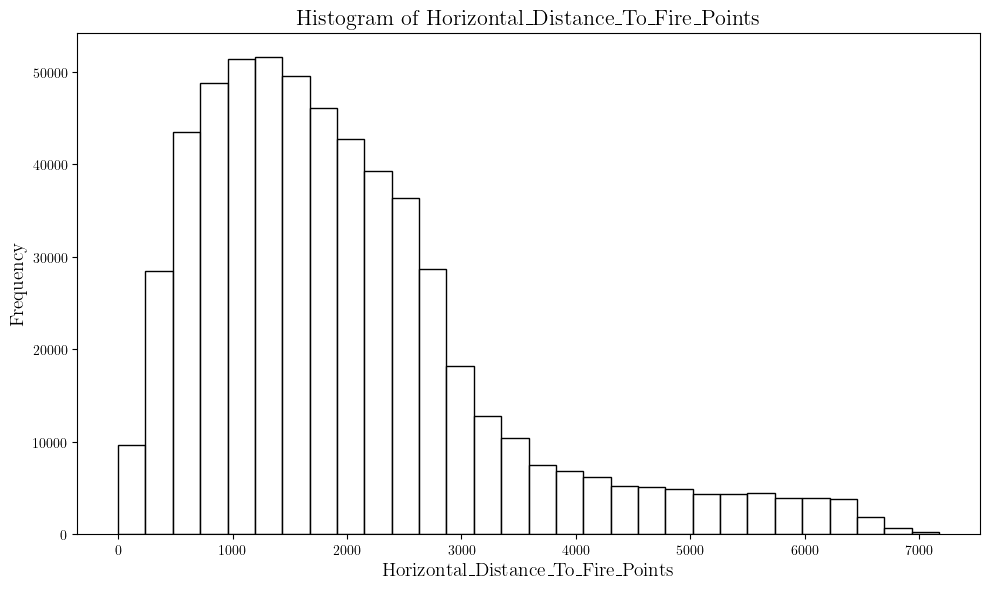

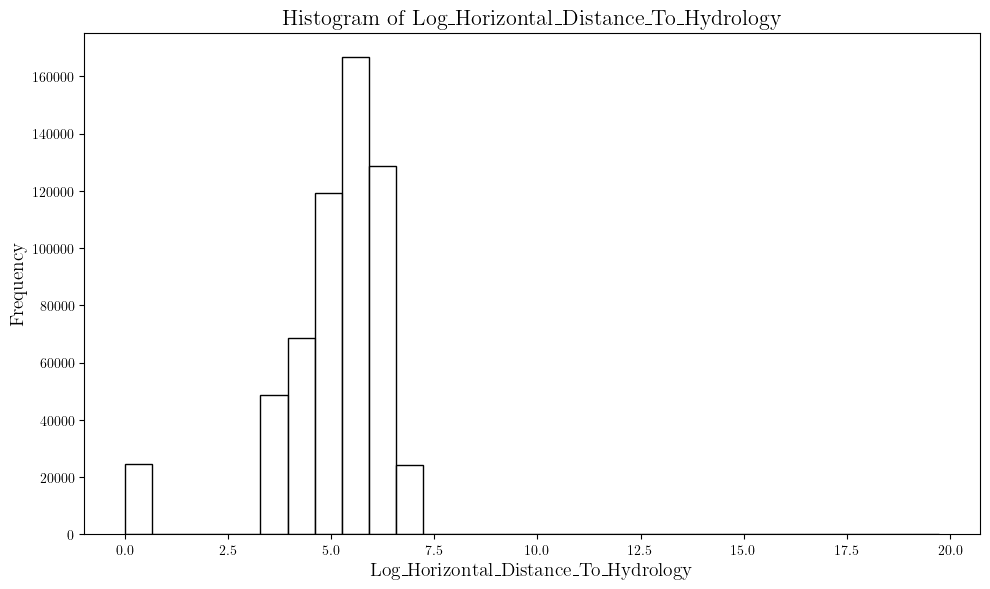

In [7]:
for feature in data.select_dtypes(include=[np.number]).columns:
    histogram(data, feature, f'../Generated-Figures/Histograms/{feature}-Histogram.png')

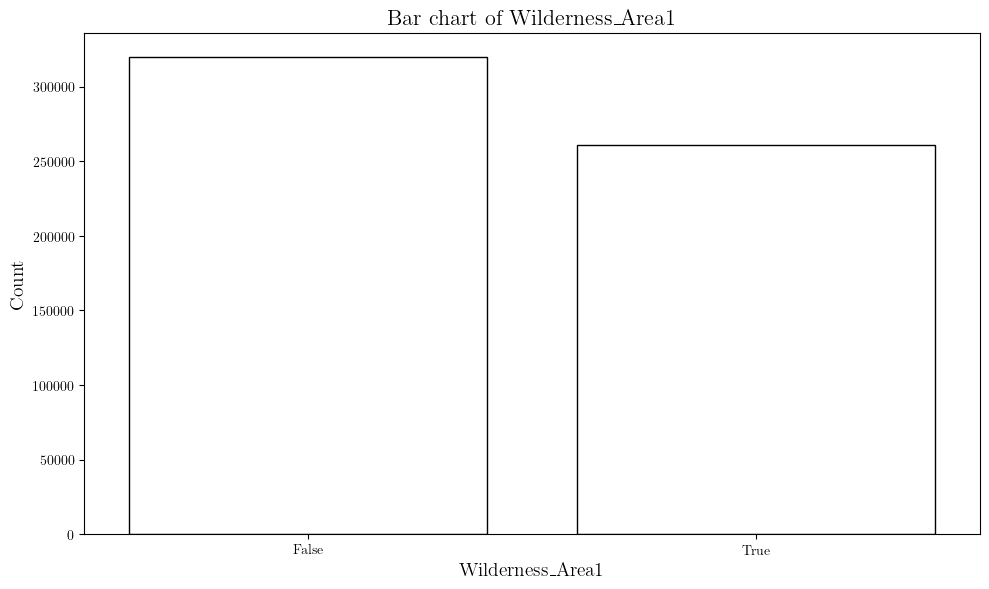

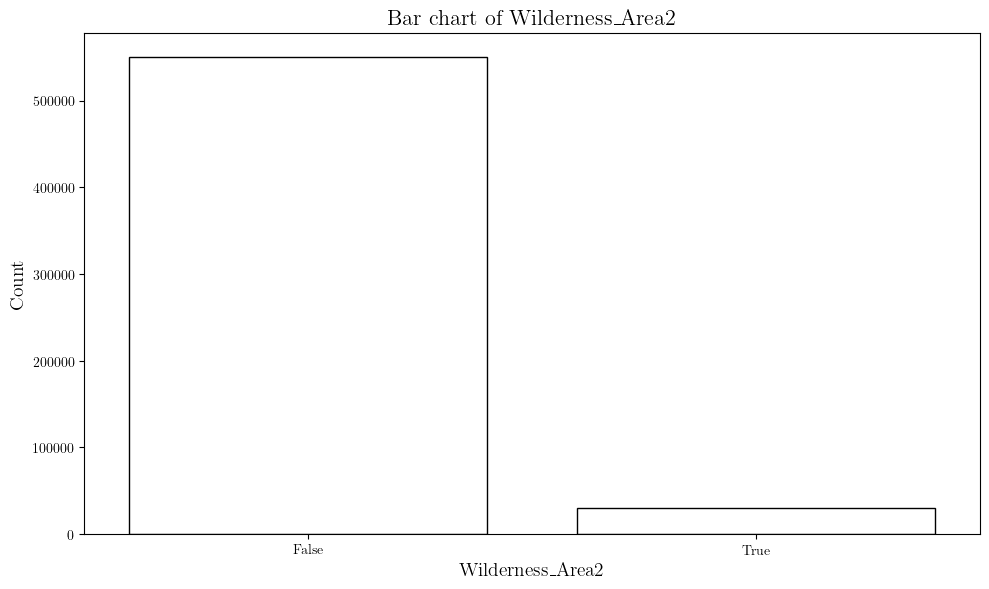

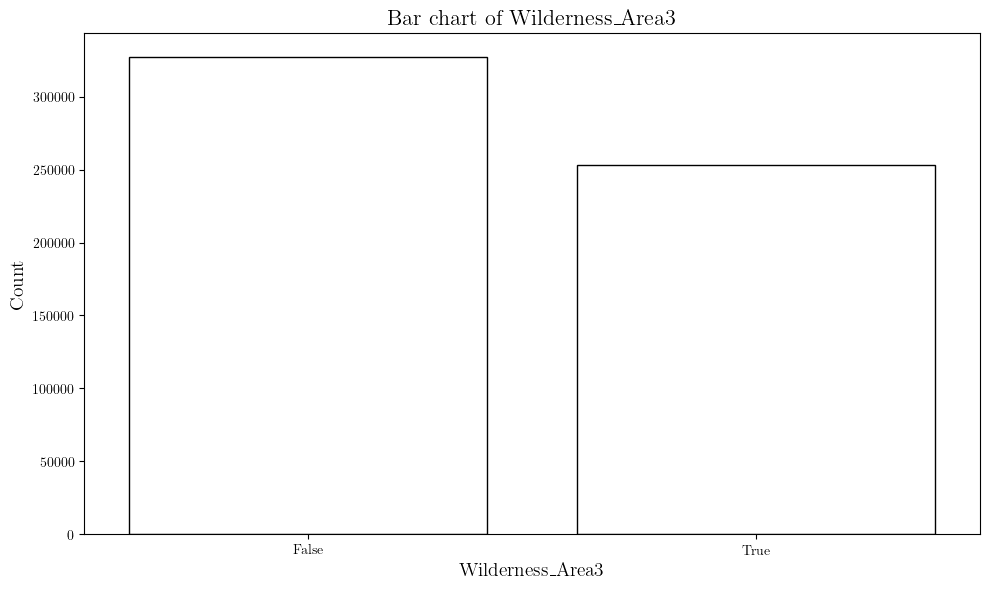

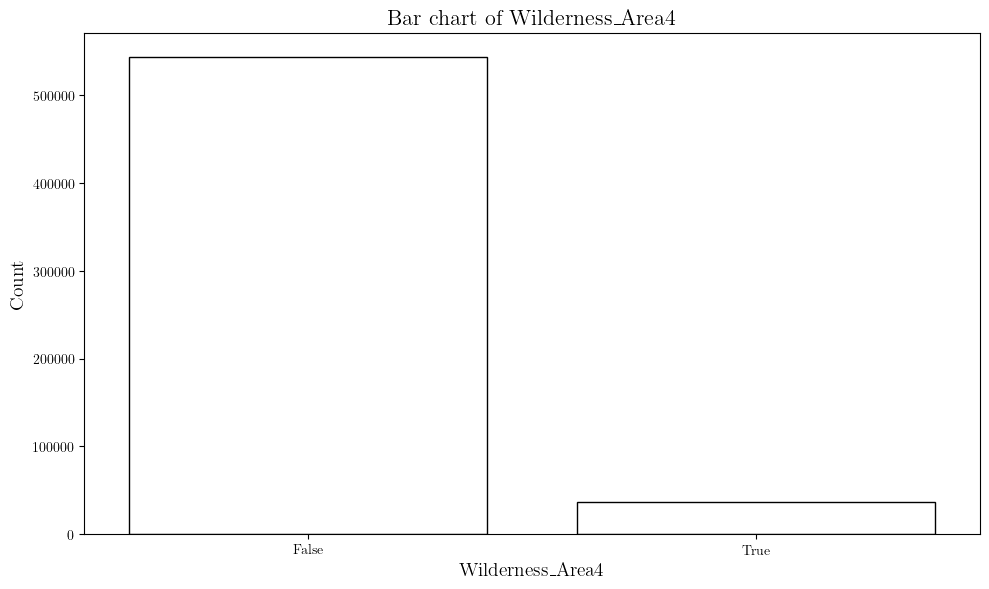

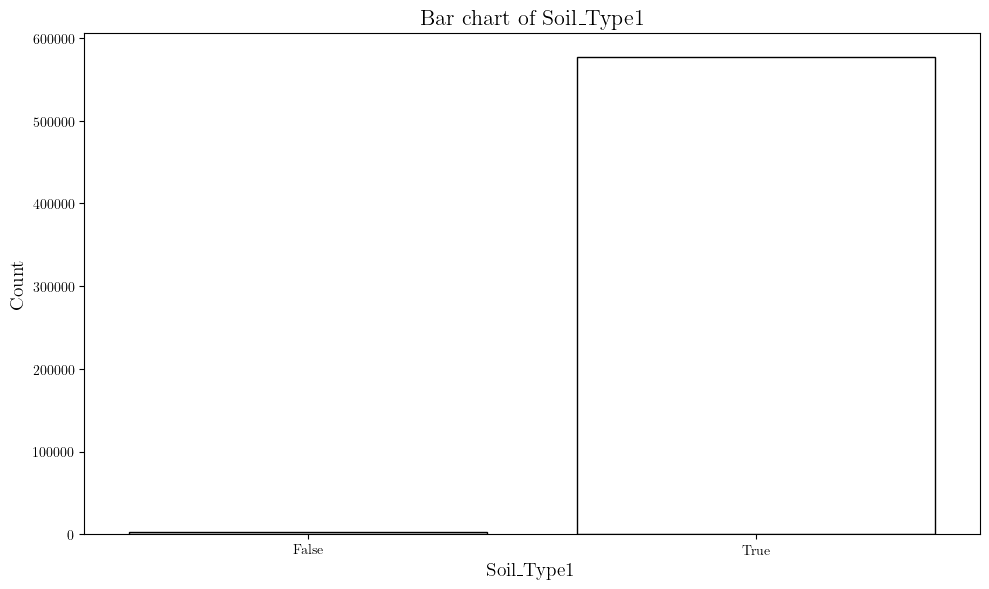

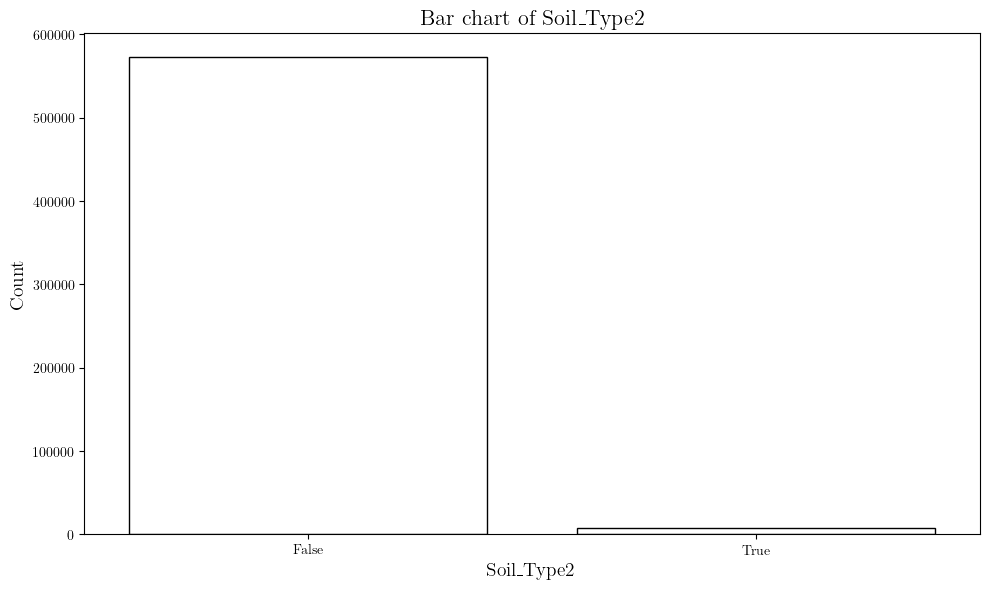

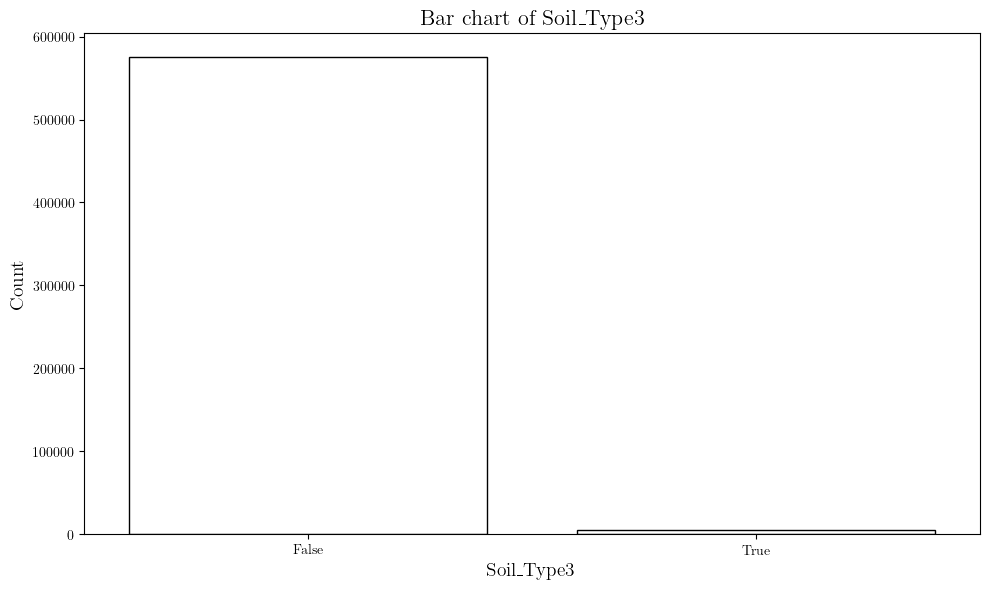

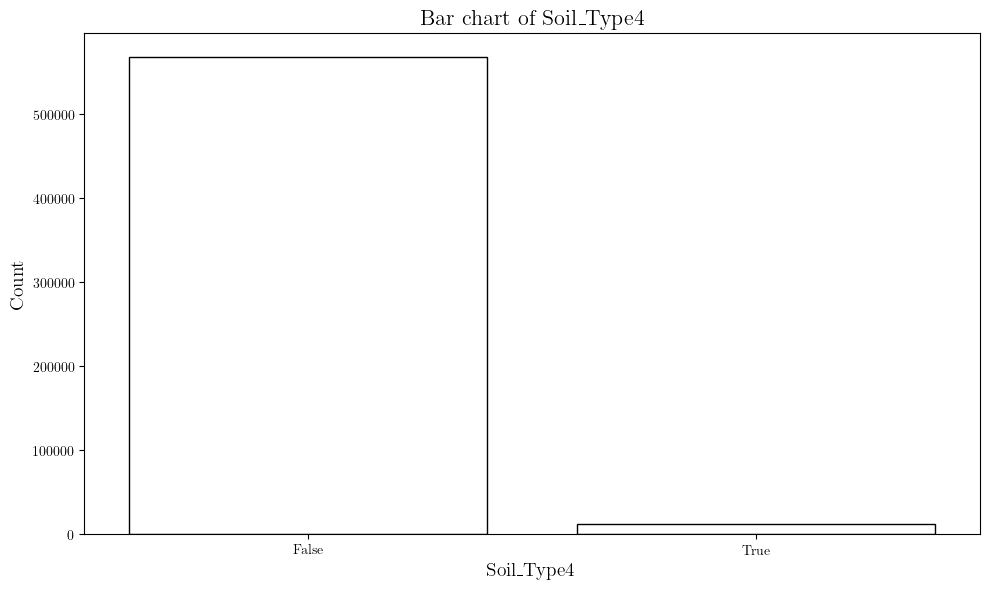

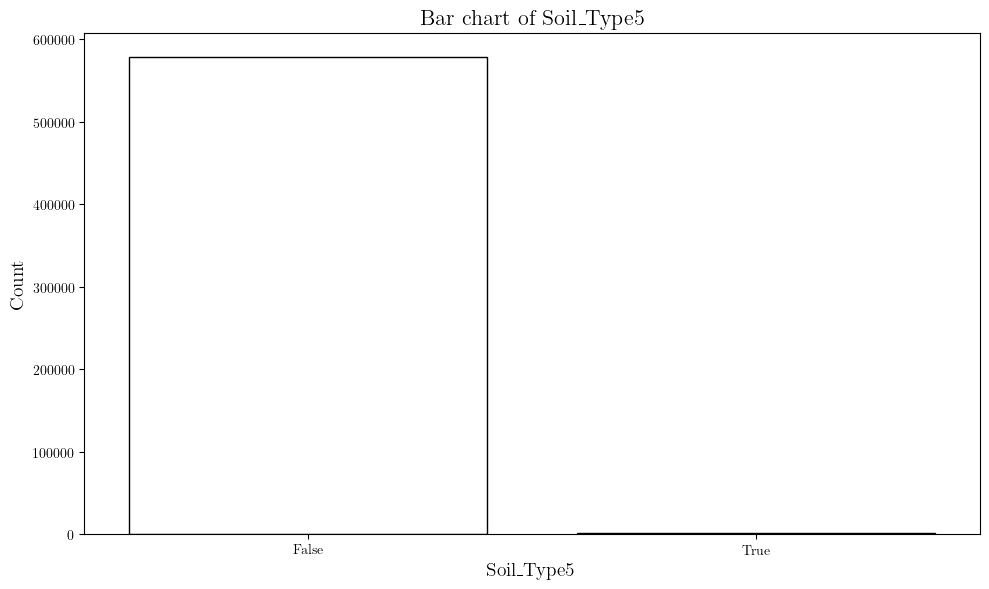

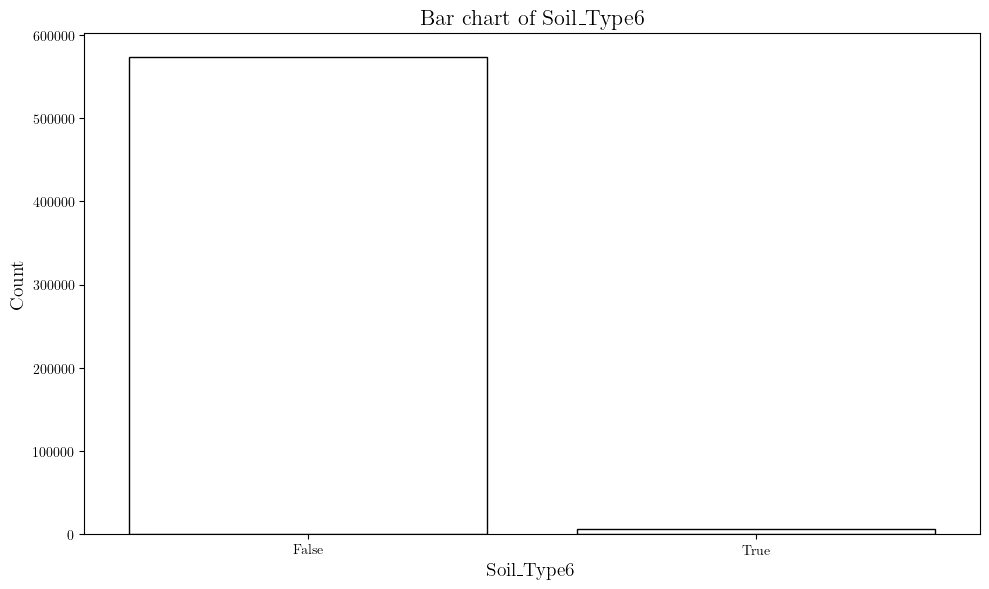

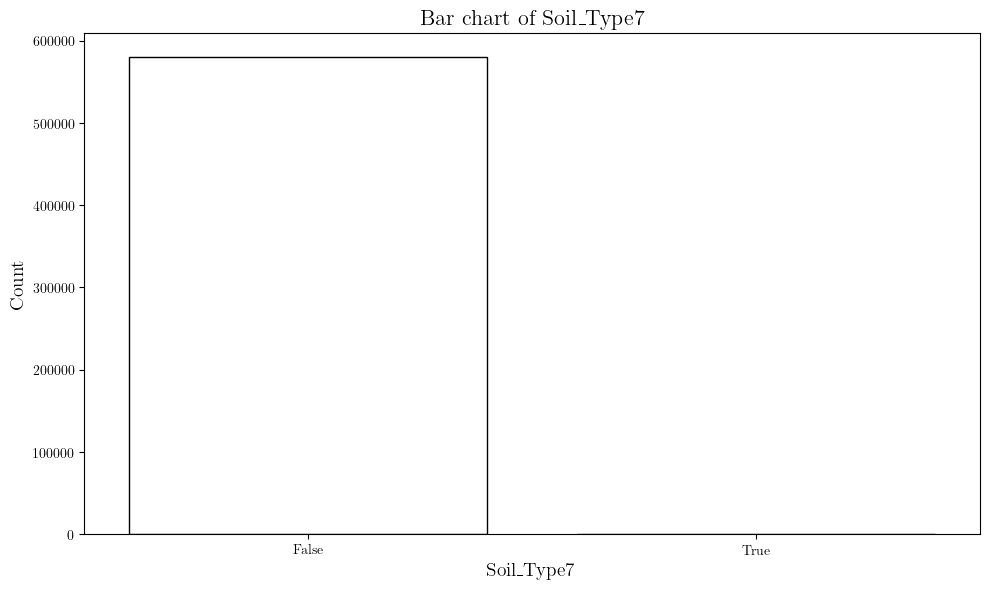

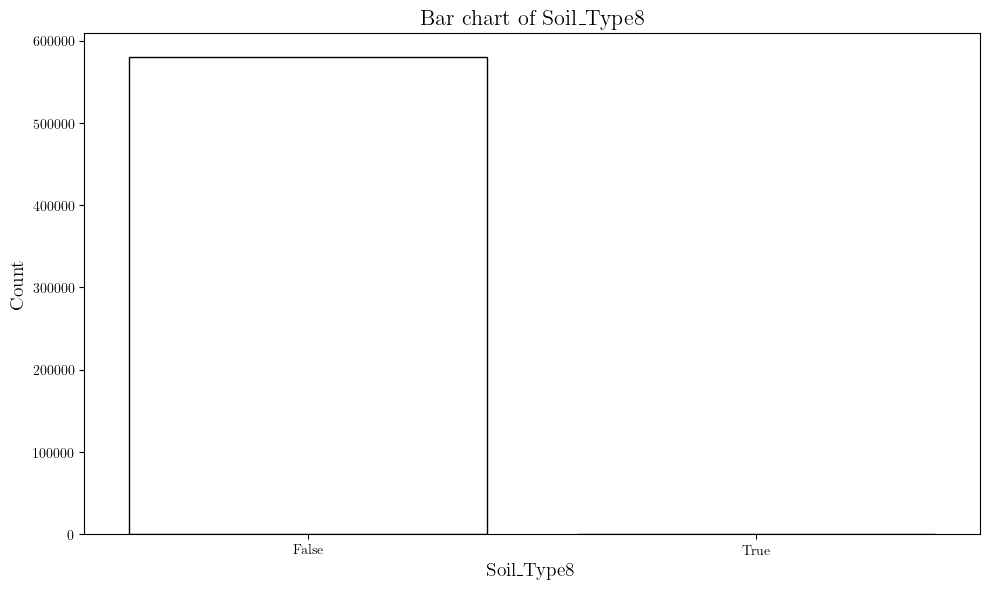

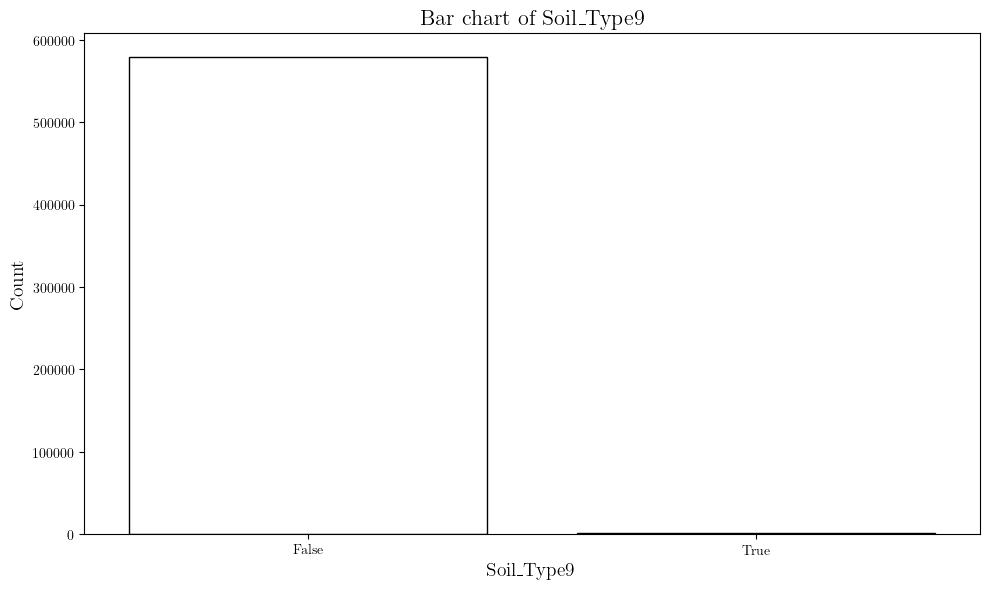

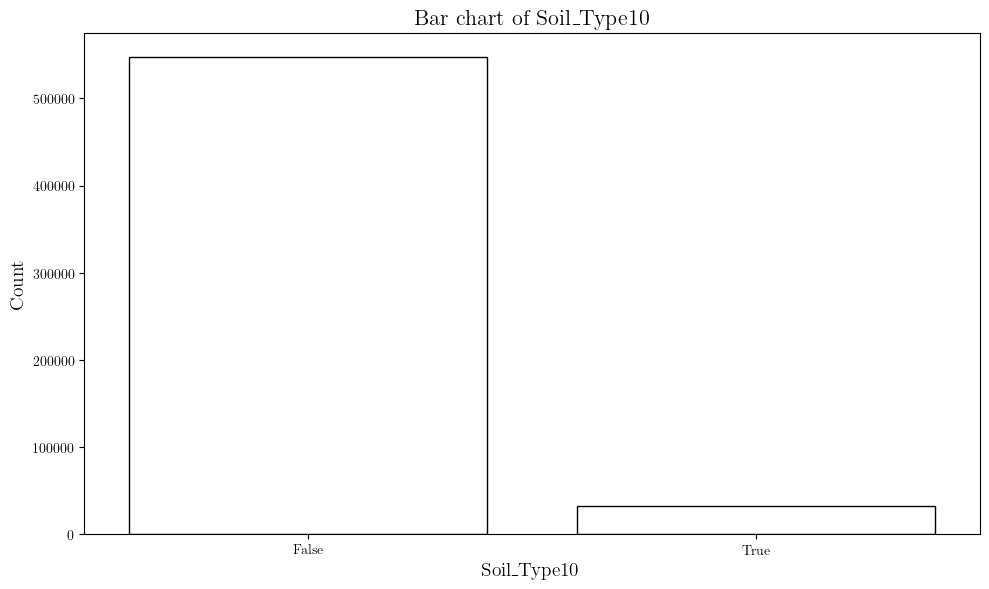

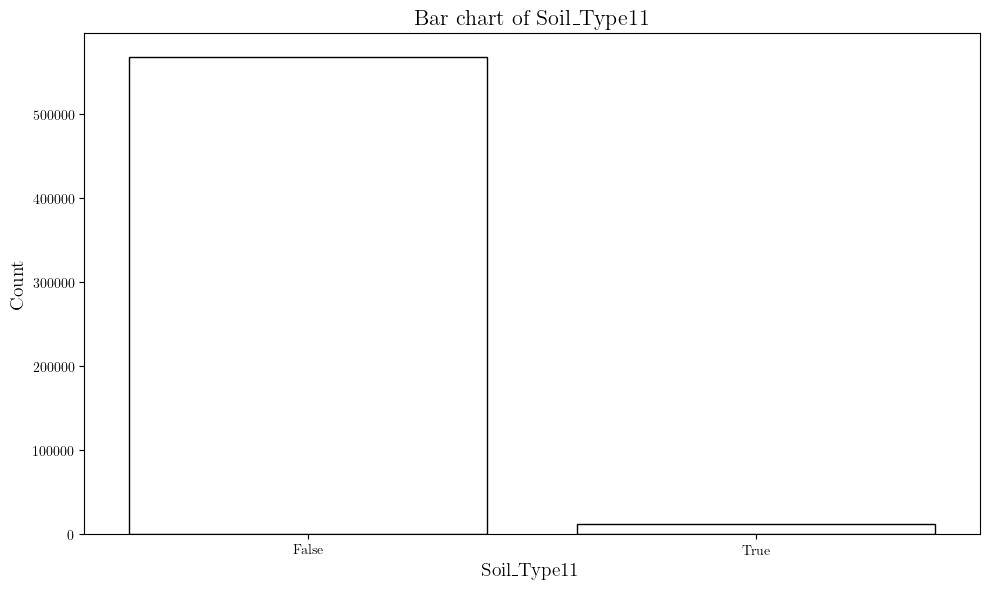

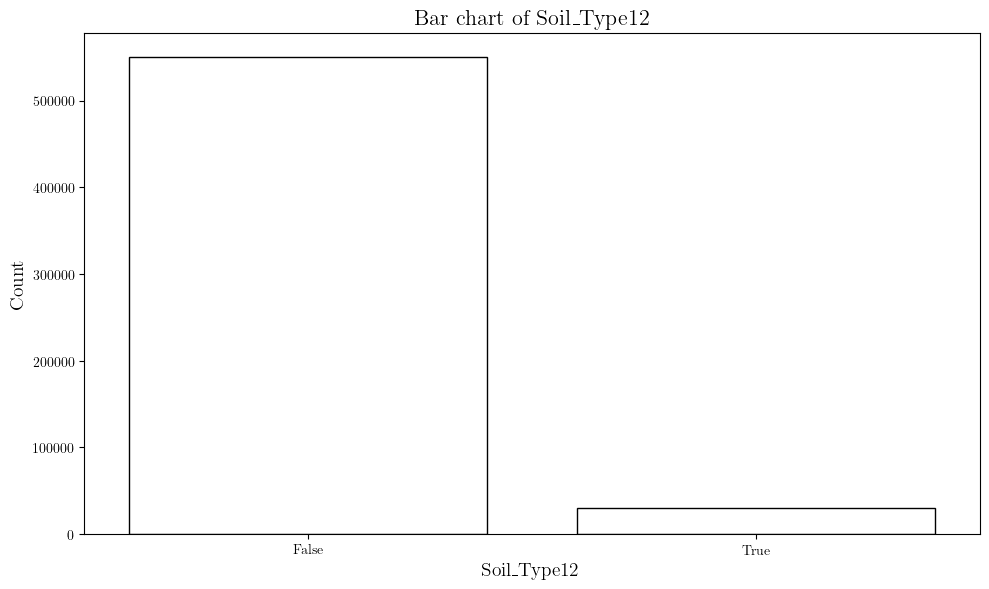

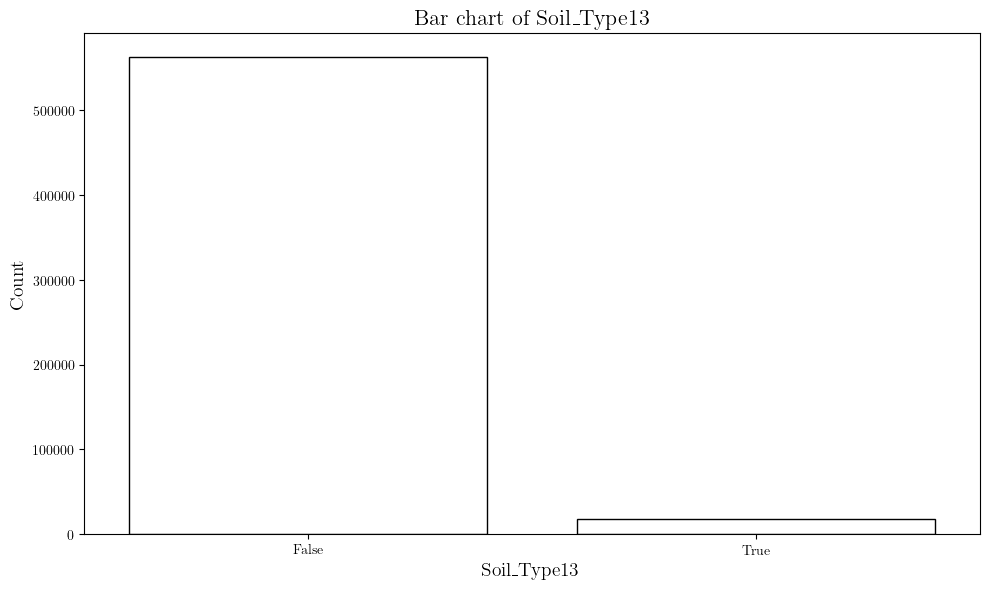

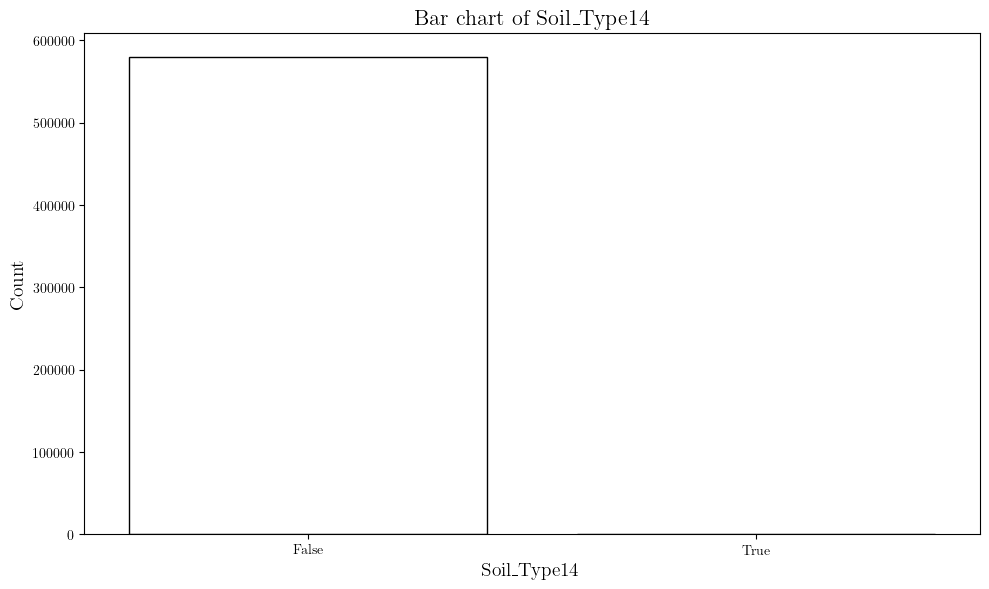

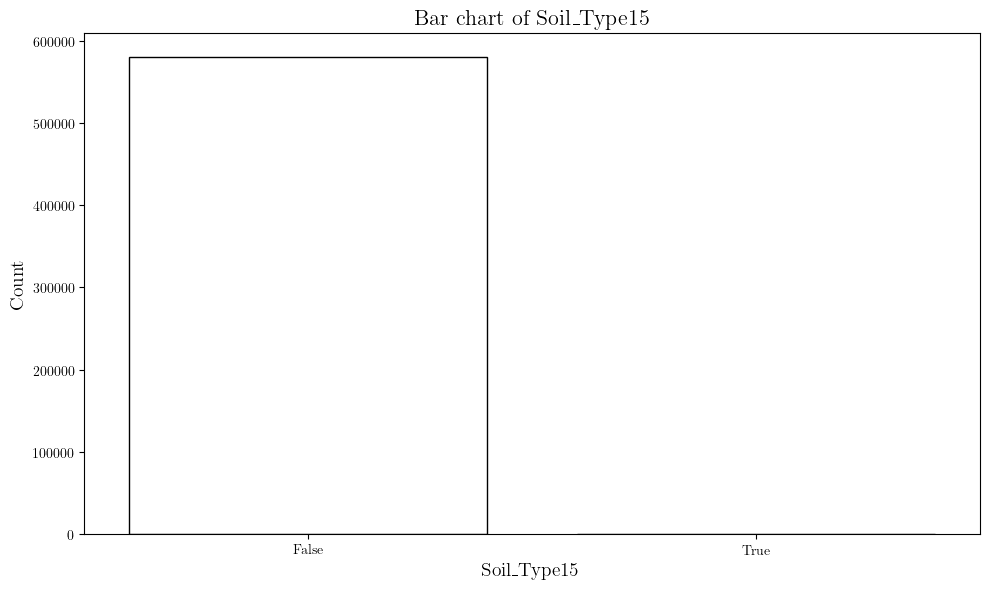

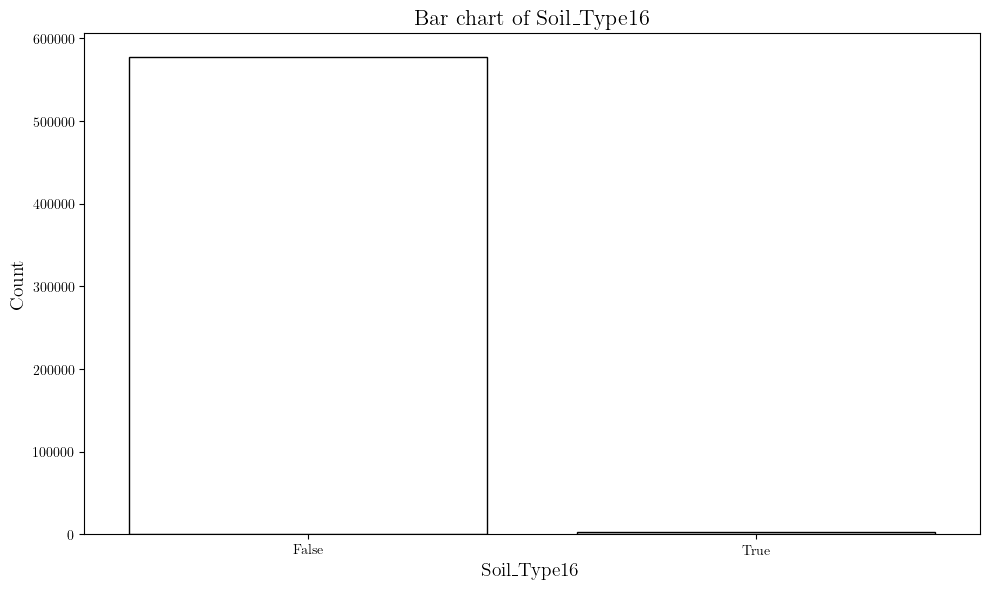

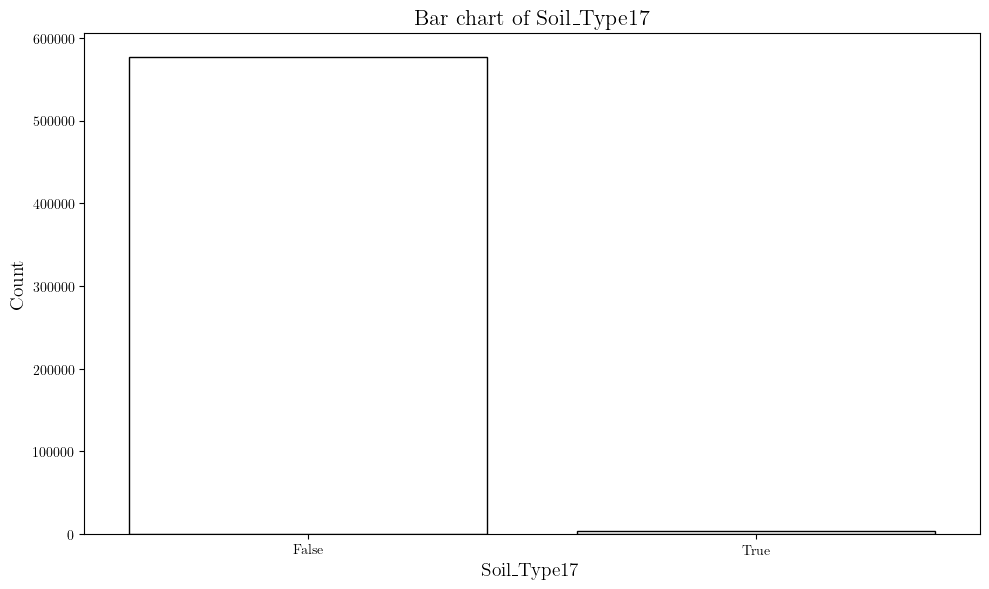

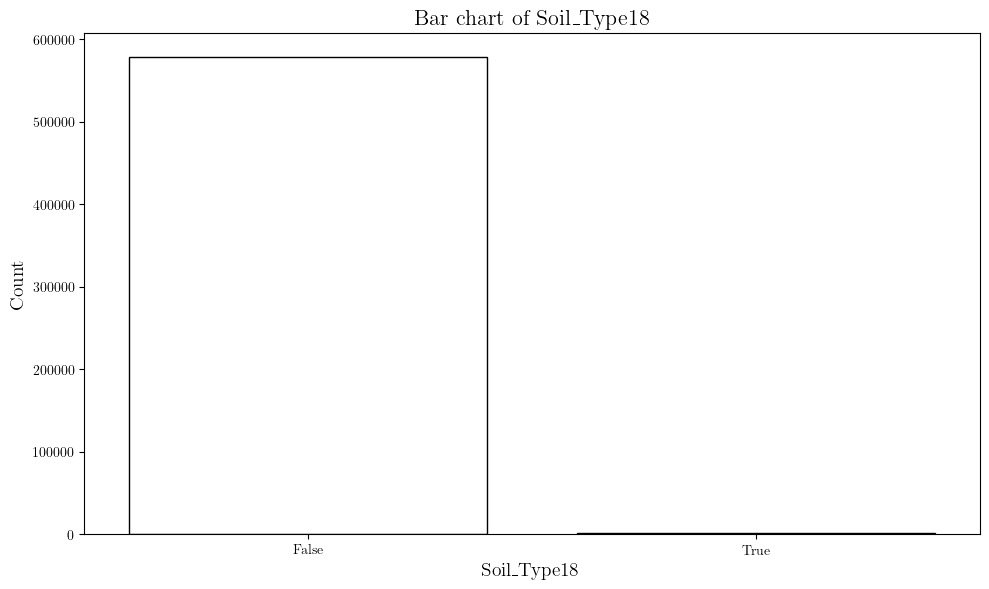

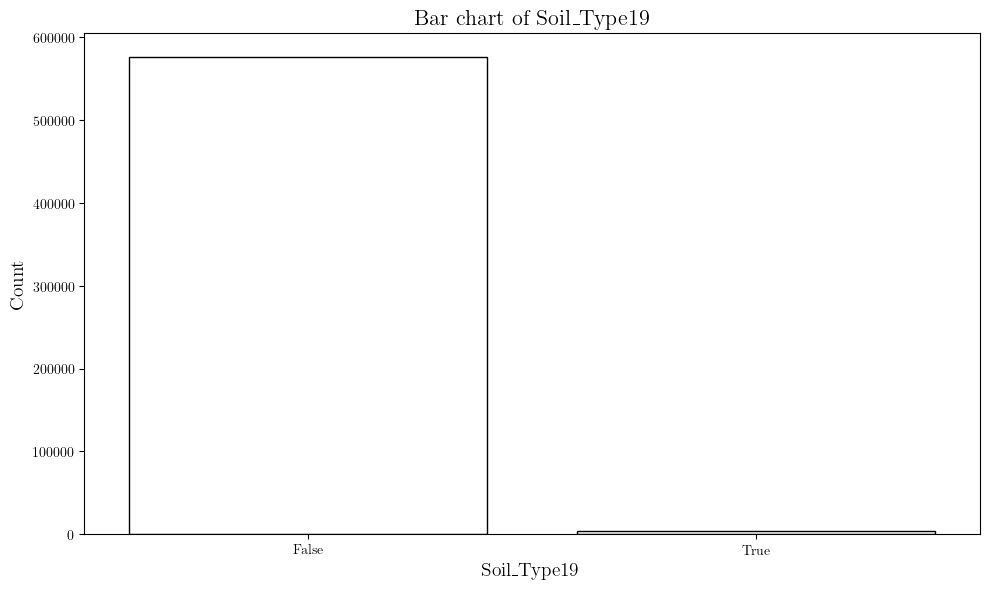

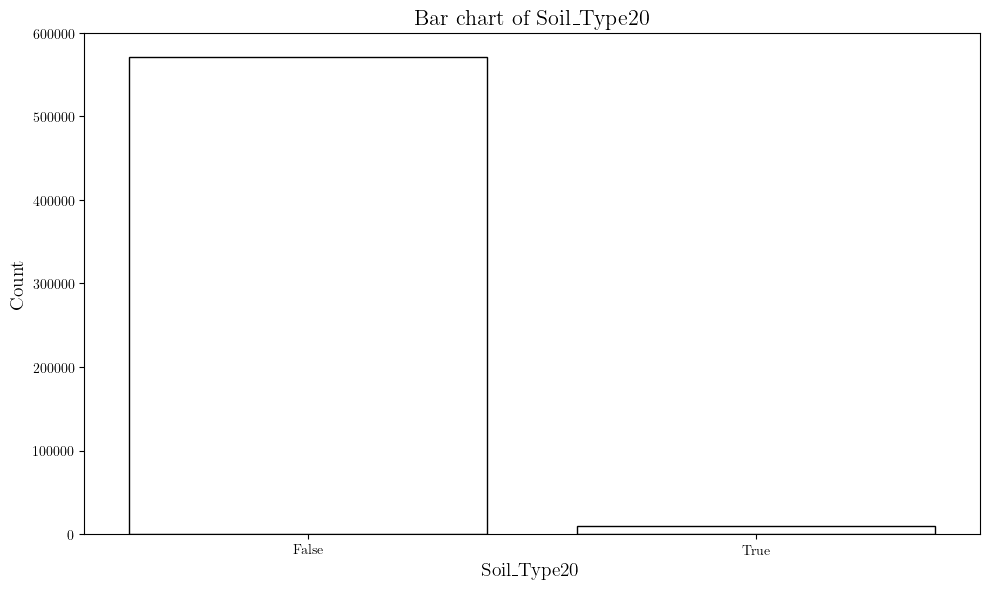

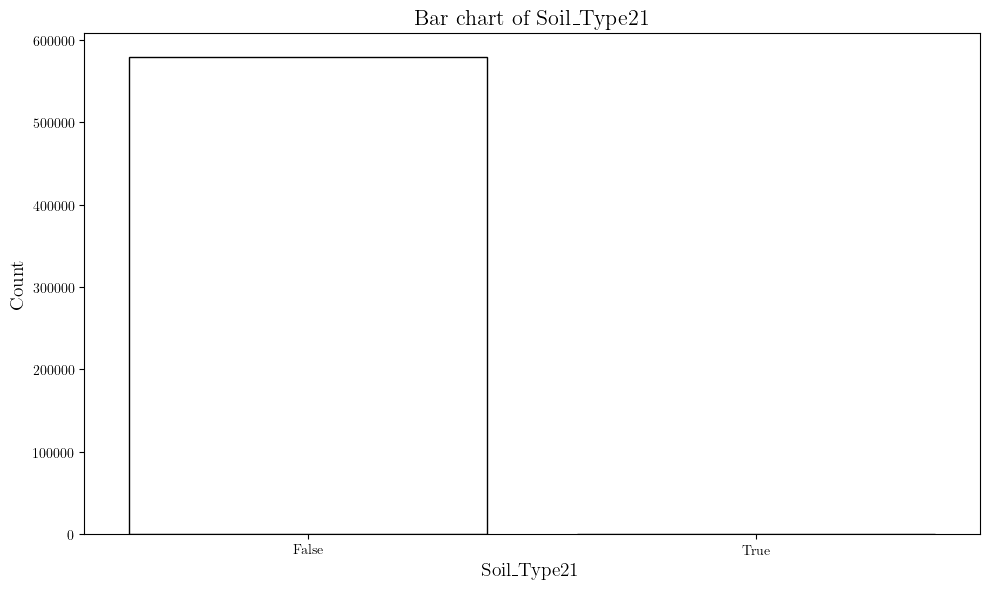

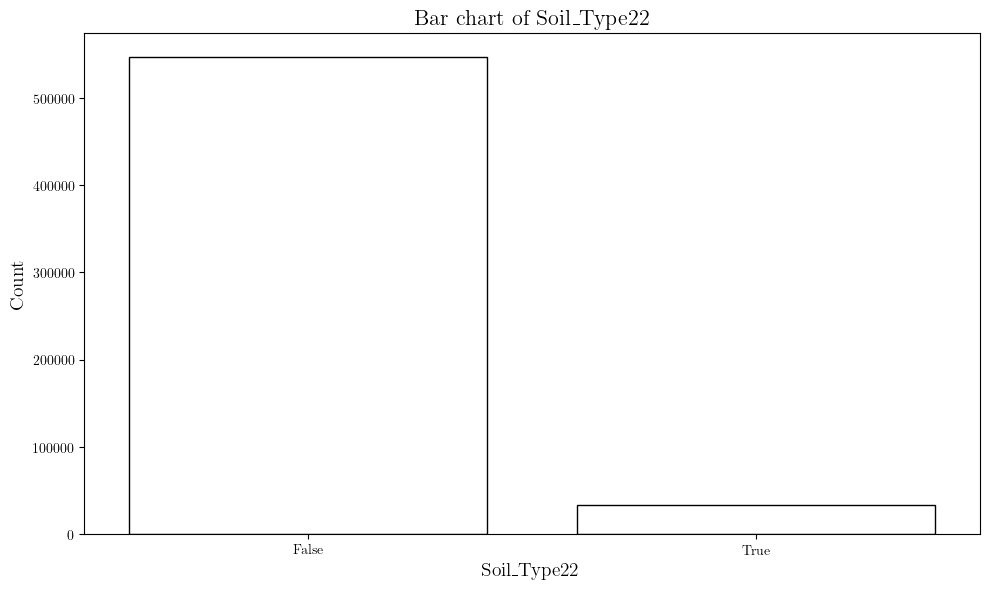

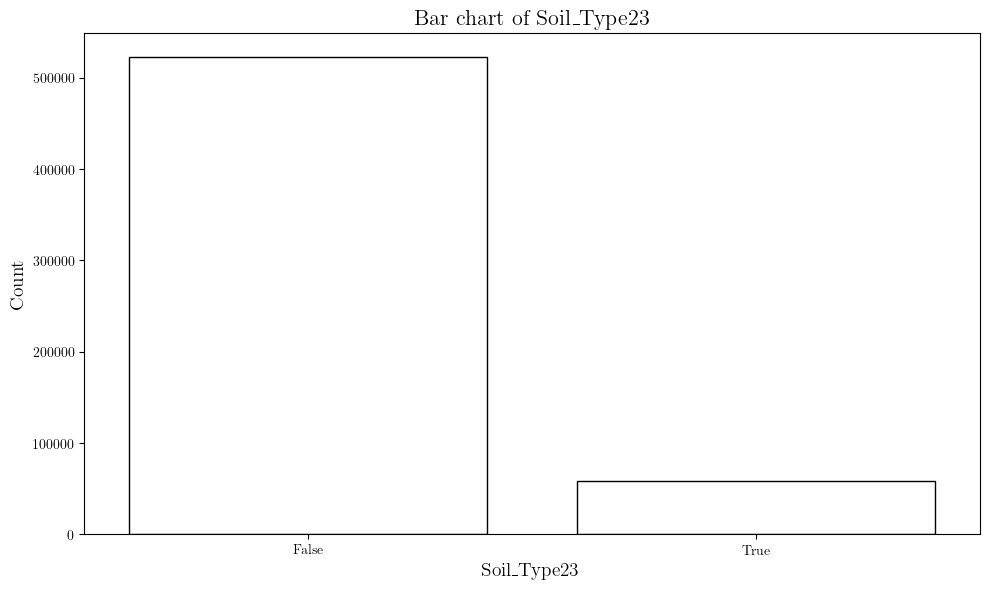

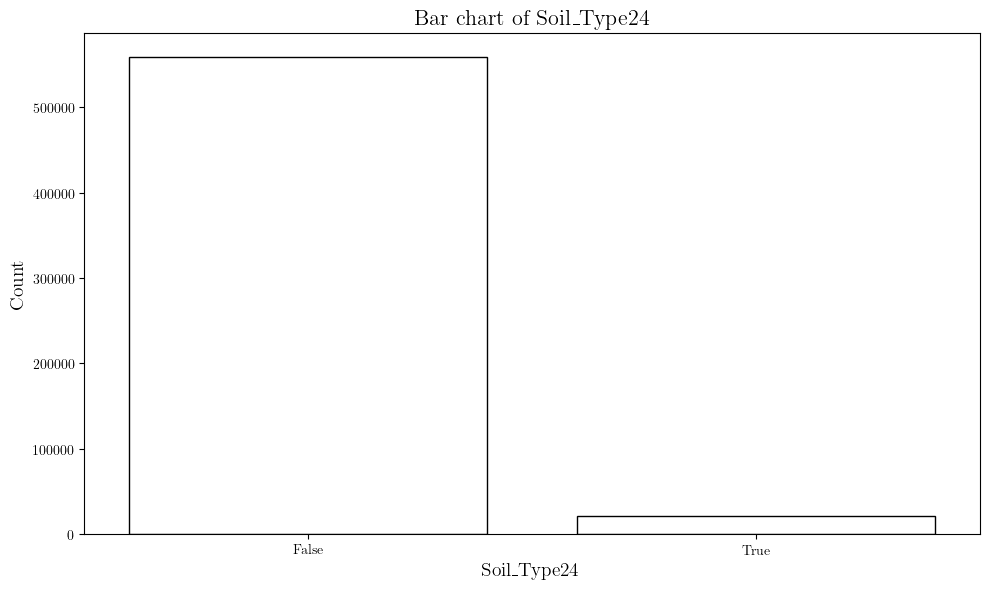

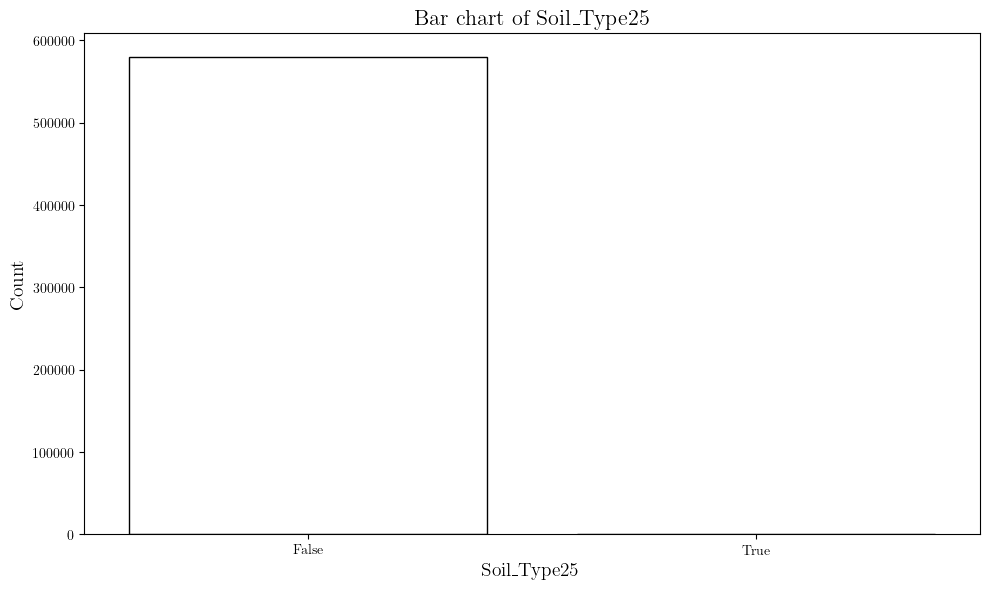

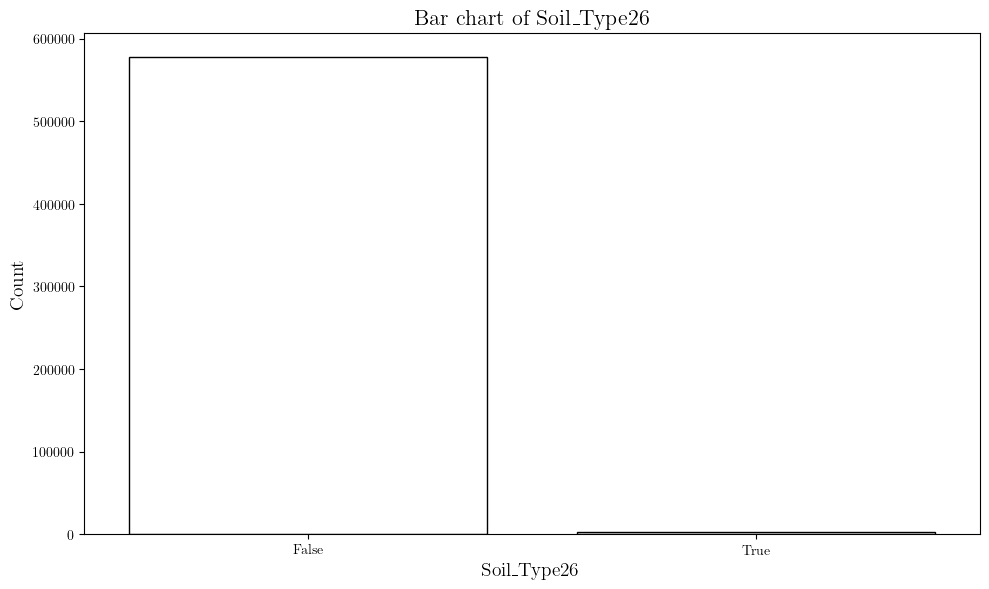

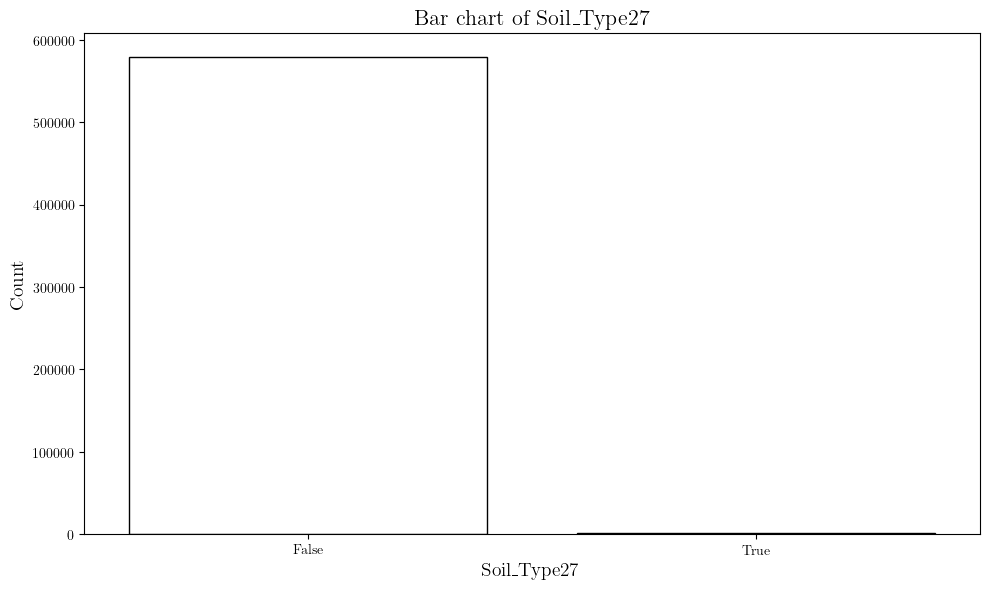

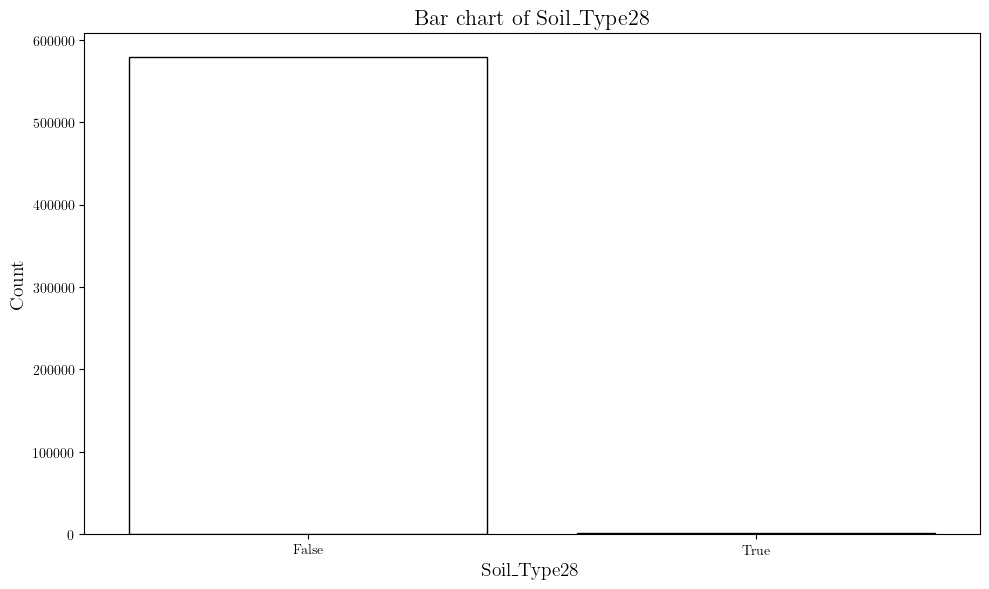

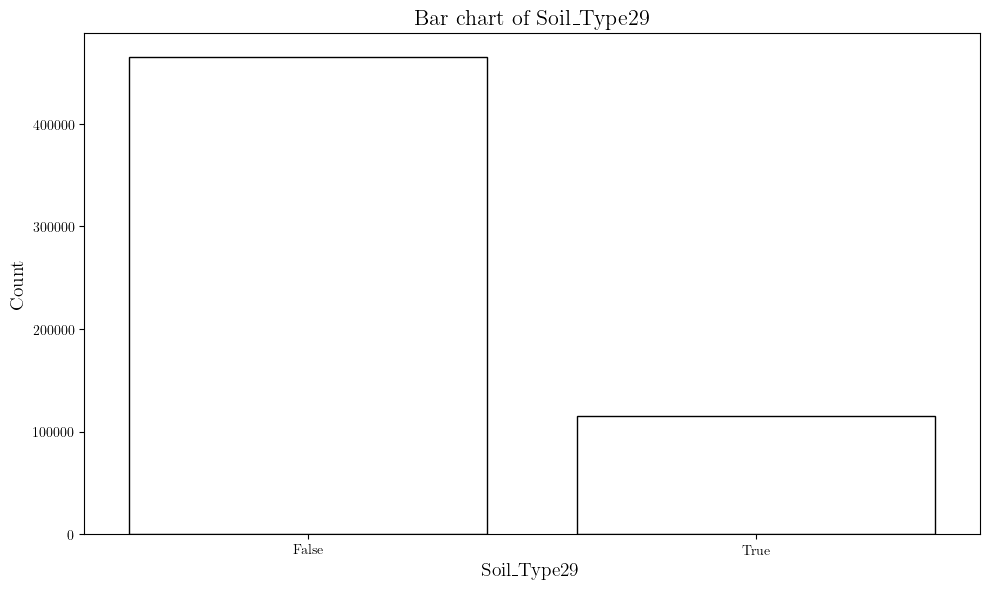

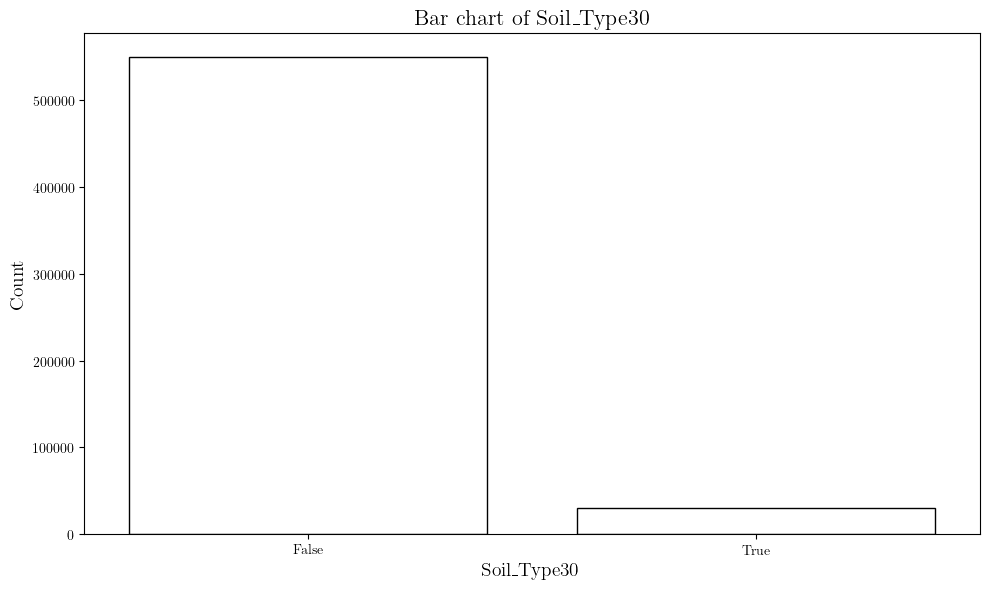

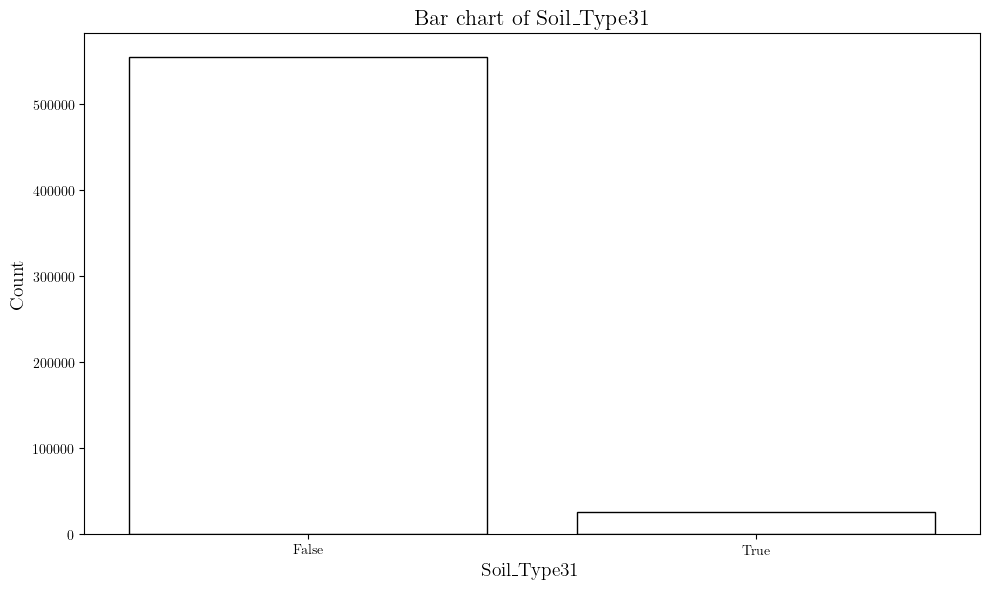

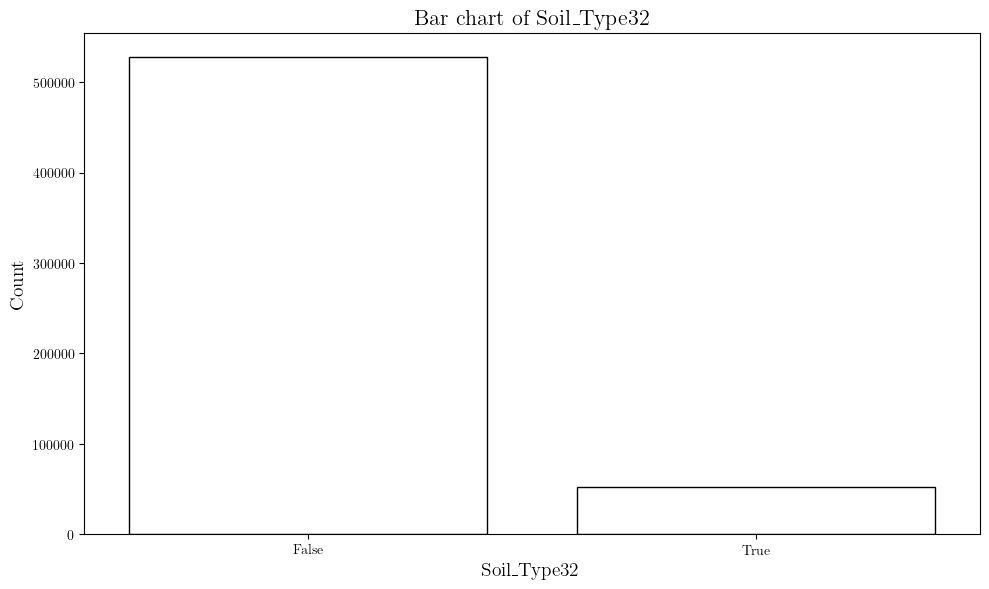

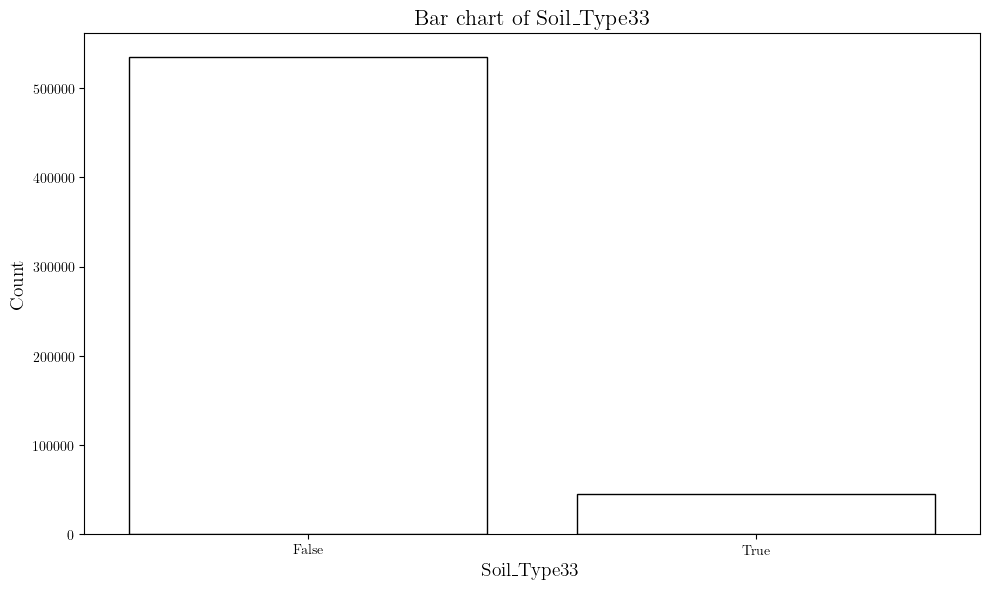

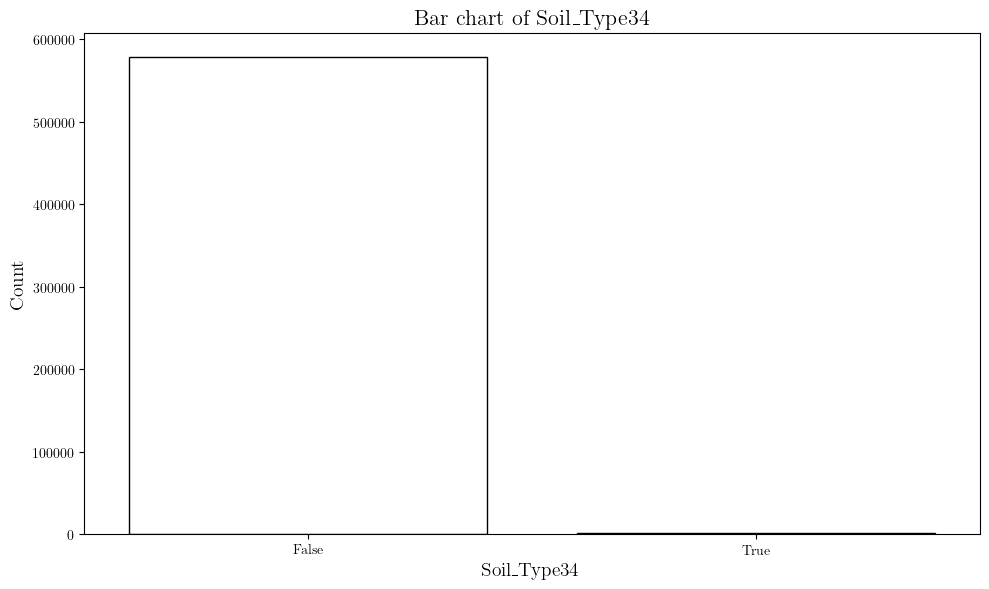

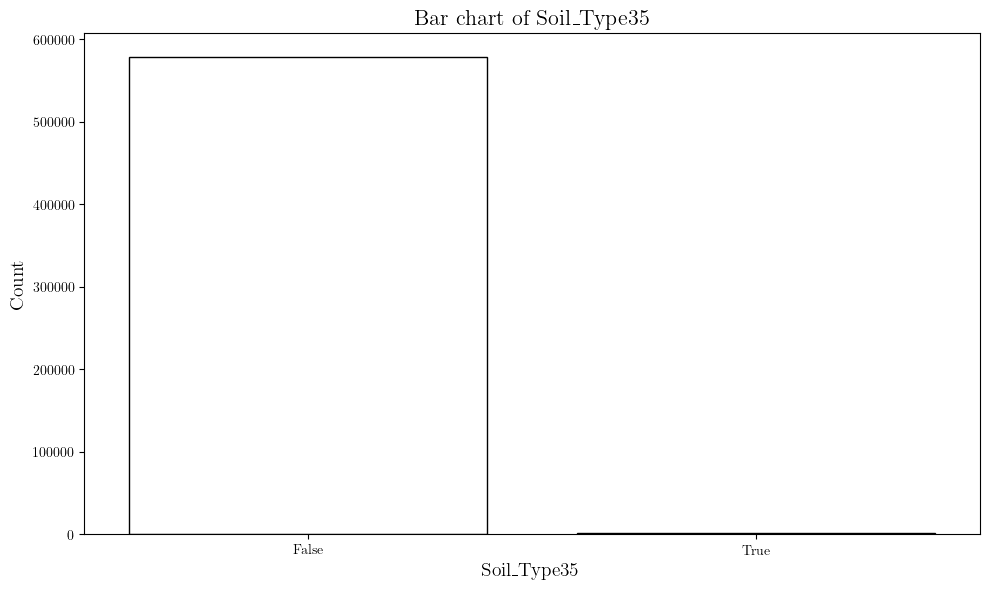

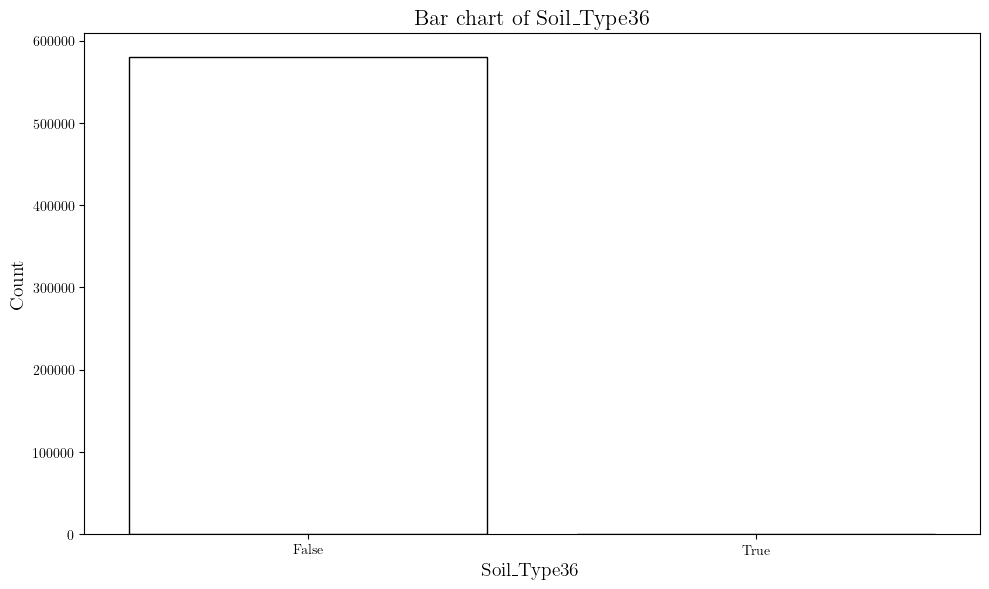

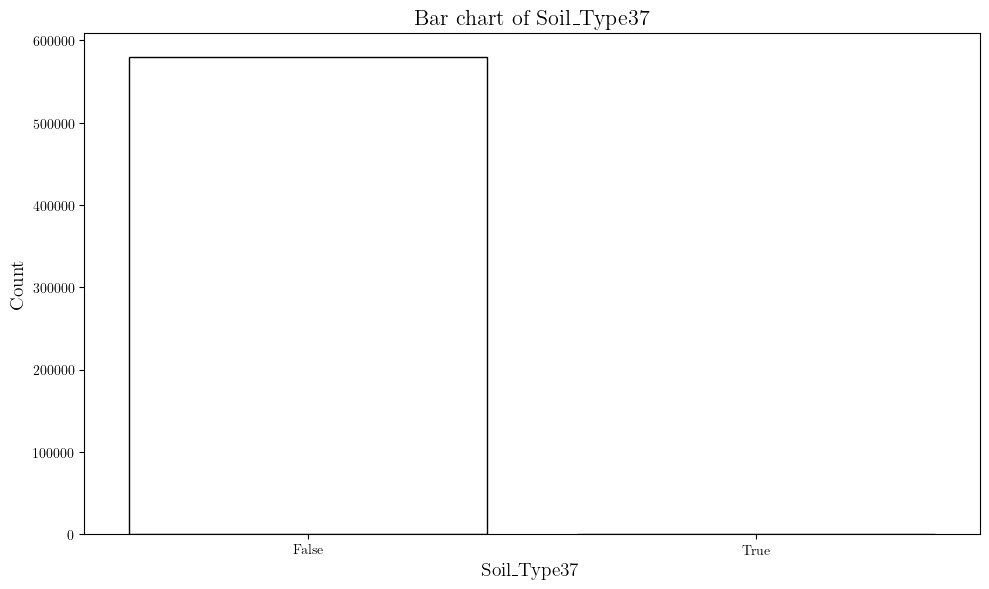

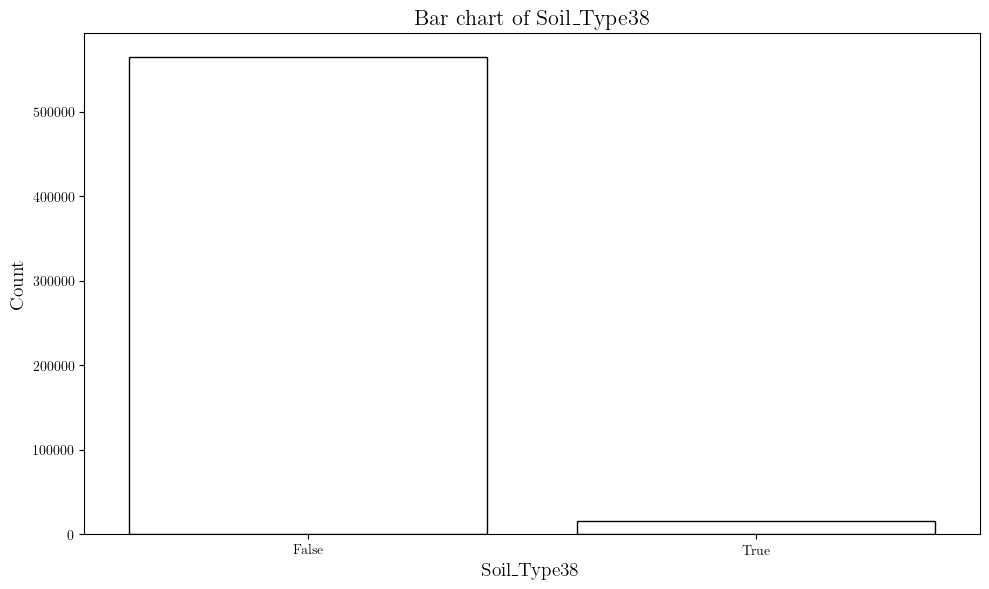

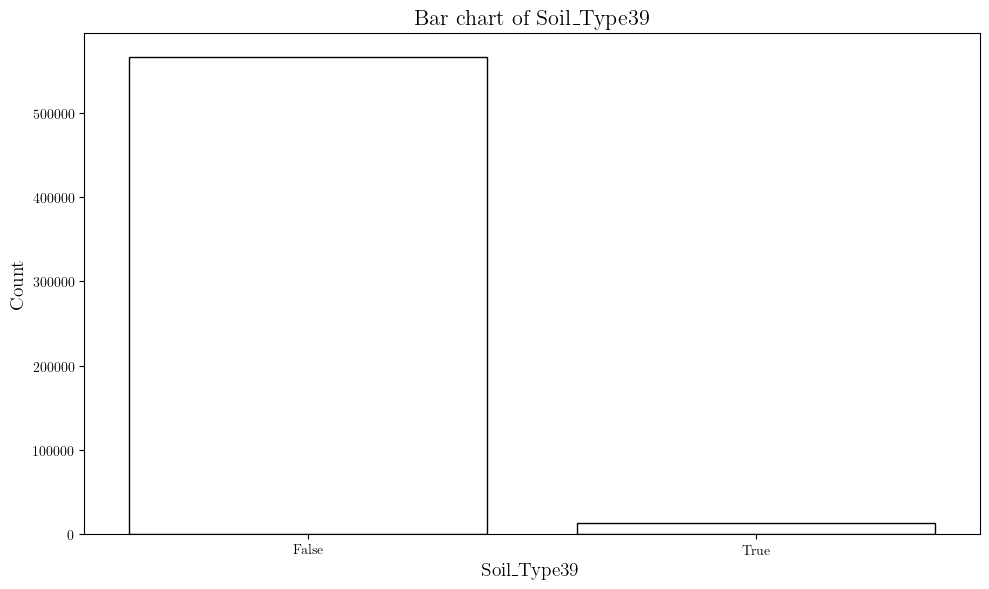

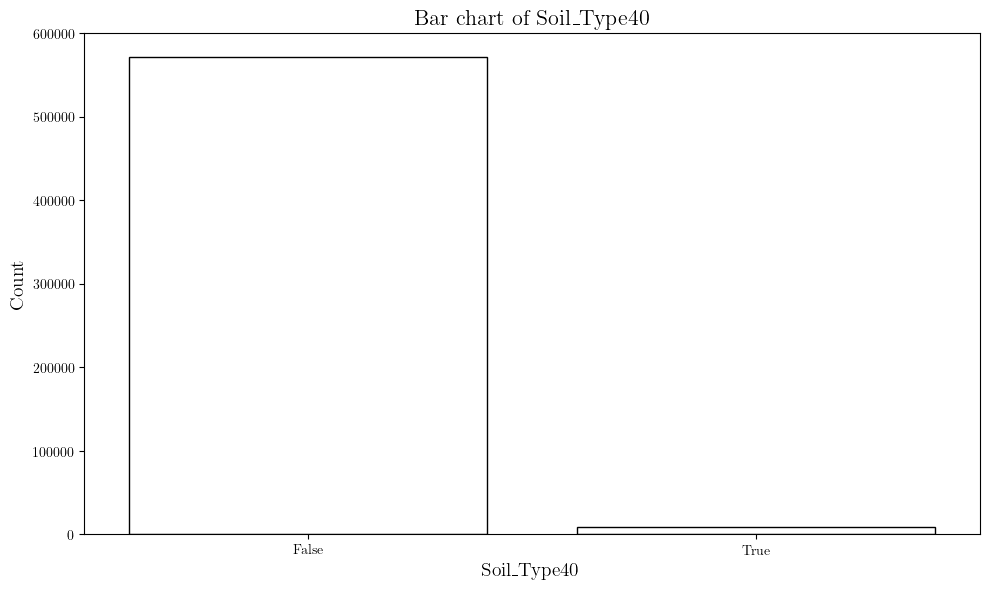

In [6]:
for feature in data.select_dtypes(include=['bool']).columns:
    bar(data, feature, f'../Generated-Figures/Bar/{feature}-Barchart.png')

**Problem:**: Invalid data type for Soil_Type1. <br>
**Solution:** Encode as boolean

**Problem:**: Please note that the two labels, Water_Level and Observation_ID, must be swapped. <br>
**Solution:** Swap features

**Problem:**: There remain features with missing values, with missing values indicated by the character symbol ‘?’. <br>
**Solution:**: The amount of missing values is not significant so we drop the patterns with missing values

Only the feature Slope contains missing values. Calculate the percentage of missing values

Visualise how many are missing in red

This is not significant, we can drop

Addressing cardinality issues. Note that we have 581012 observations

**Problem:**: Feature Observation ID has a unique value for each observation. <br>
**Solution:** Remove this feature

**Problem:**: Feature Water Level has cardinality of one. <br>
**Solution:** Remove this feature

Change data types

Calculate outliers

**Problem:**: The Facet feature is correlated with the Aspect feature. <br>
**Solution:** Drop one of the features



We drop Facet over Aspect since Facet is a float

**Problem:**: There are numerical and categorical features. <br>
**Solution:** Encoding as categorical object with pandas and training if possible else one hot encoding or binning might be required

**Problem:**: The class distribution remains skew. <br>
**Solution:** This is part of data set, we can attempt oversampling, undersampling, undersampling using TOMEK, SMOTE synthesizing

**Problem:**: There remain features with numeric ranges that differ significantly from one another. <br>
**Solution:** Normalization of values in data set post preprocessing

**Problem:**: The Inclination feature contains only noisy values. <br>
**Solution:** Remove this feature

**Problem:**: There remain features with outliers. <br>
**Solution:** Experiment with removing Clamp transformation, bimodal distribution removal in CV

Check datatypes of each feature

# Data splitting

We split the data into 80% for training and 20% for testing. 20% of the training data is used for validation